# Predicting the Soil Temperature at 100cm depth using machine learning
### 1. Problem definition
> Soil temperature is one of the important parameters of a soil characteristics that contributes information in understanding the nitrate levels of a soil at different depths. This is because the soil temperature affects the soil's microbial activity, plant uptake, volatilization of Nitrogen compounds and leaching.  NMBU measure soil temperature at different depths (2cm, 5cm, 10cm, 20cm, 50cm, 100cm) using platinum resistance thermometers called PT100. Machine learning based predication may help reducing the effort and installation cost required to measure temperature at deeper soil levels such 100cm. This machine learning algorithm will first try to predict the soil temperature at 100cm from the different data features. 
### 2. Data Source
> To start the analysis process, the data source (2018-2022) is downloaded from the Meteorological data for Ås - BIOKLIM website (https://www.nmbu.no/forskning/grupper/meteorologiske-data) and organized into one big dataset which contains nearly 1800 samples. The improvements will be: first, the dataset will be improved to have bigger number of samples (2000-2024); second, multi-sites will be considererd to make the prediction more generic for different types of soils in Norway.
> #### There is one dataset inside the data folder
### 3. Evaluation metrics
> The evaluation metrics such as R-squared (R²) Score, Mean Absolute Error (MAE), Mean Square Error (MSE) and Root Mean Square Log Error (RMSLE) will be considered as common regression metrics.
> > The goal of this machine learning model is to build a machine leanrning model that minimizes the erros: MAE, MSE, RMSLE and increase the R-squared (R²) Score.
### 4. Data Features
> The original features of the dataset are:  month,	date, mean_air_temperature_2m, min_air_temperature_2m,	max_air_temperature_2m	soil_temperature_2cm,	soil_temperature_5cm,	soil_temperature_10cm,	soil_temperature_20cm,	soil_temperature_50cm,	relative_humudity_%,	air_pressure__2m_mbar,	radiation_balance_w_m2,	albedo_RR_GR,	earth_heat_flux_MJ_m2,	evaporation_mm,	rainfall_mm,	snowfall_cm. But through feature importance analysis less number of features will be used for consideration.
>> The original dataset is inside the data folder in this project with a file name 'NMBUBigDatasetFinal.csv'.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
# Import the train_test_split module from sklearn
from sklearn.model_selection import train_test_split
# For z-score calculations
from scipy import stats
# Import the GridSearchCV and RandomizeSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import mplcursors

In [2]:
dataset = pd.read_csv("data/NMBUBigDatasetFinal.csv", low_memory=False)

In [3]:
dataset

ID       date  mean_air_temperature_2m  min_air_temperature_2m  \
0        1   1/1/2000                   -4.958                  -7.620   
1        2   1/2/2000                    0.649                  -4.951   
2        3   1/3/2000                    2.129                  -1.130   
3        4   1/4/2000                    1.762                  -3.258   
4        5   1/5/2000                    0.557                  -3.631   
...    ...        ...                      ...                     ...   
8851  8852  3/28/2024                    5.222                   2.426   
8852  8853  3/29/2024                    5.930                   4.711   
8853  8854  3/30/2024                    5.908                   3.958   
8854  8855  3/31/2024                    6.167                   2.384   
8855  8856   4/1/2024                    6.529                   1.428   

      max_air_temperature_2m  relative_humidity  air_pressure__2m_mbar  \
0                     -3.021            100.000               1001.536   
1                      4.009             88.578                997.675   
2                      4.588             88.588                991.451   
3                      4.390             67.333                986.959   
4                      4.385             98.227                993.310   
...                      ...                ...                    ...   
8851                   7.898             90.027                976.682   
8852                   7.385             93.565                978.338   
8853                   7.362             94.385                990.109   
8854                   8.020             93.633                988.136   
8855                  10.980             75.057                990.105   

      precipitation_mm  evaporation_mm  earth_heat_flux_MJ_m2    JT2    JT5  \
0                  NaN             NaN                 -0.272 -0.186 -0.090   
1                  NaN             NaN                 -0.192 -0.136 -0.074   
2                8.800             NaN                 -0.083 -0.063 -0.057   
3                2.100             NaN                 -0.067 -0.043 -0.030   
4                1.200             NaN                 -0.218 -0.043 -0.023   
...                ...             ...                    ...    ...    ...   
8851             7.594             NaN                  0.603  1.571  1.316   
8852             2.573             NaN                  0.774  2.891  2.577   
8853             1.980             NaN                  0.651  3.450  3.302   
8854             2.903             NaN                  0.568  4.197  4.050   
8855             0.000             NaN                  0.783  4.376  4.302   

       JT10   JT20   JT50  radiation_balance_w_m2  \
0     0.058  0.443  1.872                  -0.122   
1     0.041  0.448  1.873                  -2.208   
2     0.039  0.450  1.873                  -1.796   
3     0.082  0.468  1.917                  -4.827   
4     0.104  0.475  1.922                  -0.442   
...     ...    ...    ...                     ...   
8851  1.008  0.944  1.236                   0.448   
8852  2.134  1.735  1.510                   0.286   
8853  2.837  2.454  1.949                   0.611   
8854  3.616  3.135  2.404                   0.015   
8855  3.859  3.526  2.818                   4.438   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  JT100  
0                                   1.171         0.739            NaN  3.427  
1                                   1.618         0.767            NaN  3.406  
2                                   0.707         0.390            NaN  3.391  
3                                   2.487         0.478            NaN  3.393  
4                                   1.675         0.169            NaN  3.361  
...                                   ...           ...            ...    ...  
8851                                0.213        -0.121            NaN  1.986  
8852

# 1. Data Preprocessing Stage
### Excel manipulation to clean the original dataset
#### 1. Duplicate values were removed where one date is repeated.
#### 2. Some of the snow_depth_cm data read from sensor are replaced by the manually recorded snow_depth_manual_cm data if manual recording data exists
#### 3. Unnecessary columns are removed from the original dataset


In [4]:
# dataset['snow_depth_cm'] = dataset['snow_depth_cm'].fillna(dataset['snow_depth_manual_cm'])
# dataset.drop('snow_depth_manual_cm', axis=1, inplace=True)

In [5]:
# Add a year, month and day columns by feature engineering to make manipulation of these easy
dataset['date'] = pd.to_datetime(dataset['date'])
dataset_copied = dataset.copy()
dataset_copied['year'] = dataset_copied['date'].dt.year
dataset_copied['month'] = dataset_copied['date'].dt.month
dataset_copied['day'] = dataset_copied['date'].dt.day

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   8856 non-null   int64         
 1   date                                 8856 non-null   datetime64[ns]
 2   mean_air_temperature_2m              8856 non-null   float64       
 3   min_air_temperature_2m               8856 non-null   float64       
 4   max_air_temperature_2m               8856 non-null   float64       
 5   relative_humidity                    8764 non-null   float64       
 6   air_pressure__2m_mbar                8822 non-null   float64       
 7   precipitation_mm                     8402 non-null   float64       
 8   evaporation_mm                       2466 non-null   float64       
 9   earth_heat_flux_MJ_m2                7891 non-null   float64       
 10  JT2         

In [7]:
dataset.isna().sum()

ID                                        0
date                                      0
mean_air_temperature_2m                   0
min_air_temperature_2m                    0
max_air_temperature_2m                    0
relative_humidity                        92
air_pressure__2m_mbar                    34
precipitation_mm                        454
evaporation_mm                         6390
earth_heat_flux_MJ_m2                   965
JT2                                      96
JT5                                      94
JT10                                    157
JT20                                    170
JT50                                    324
radiation_balance_w_m2                  202
phosynthetic_active_radiation_mE_m2     427
albedo_RR_GR                            684
snow_depth_cm                          7537
JT100                                    95
dtype: int64

### NOTE: There are huge missing values for evaporation_mm= 6392, snow_depth_cm=7272 which hugely affect our data if we randomly impute them. So we need to study why these data are missing to decide on either to impute or drop these features from our dataset. To see if the missing values are evenly distributed throughout the period or are missing at specific instants, let us see the time series trend.

#### Draw Evaporation(mm) vs Time to see the trend and missing values

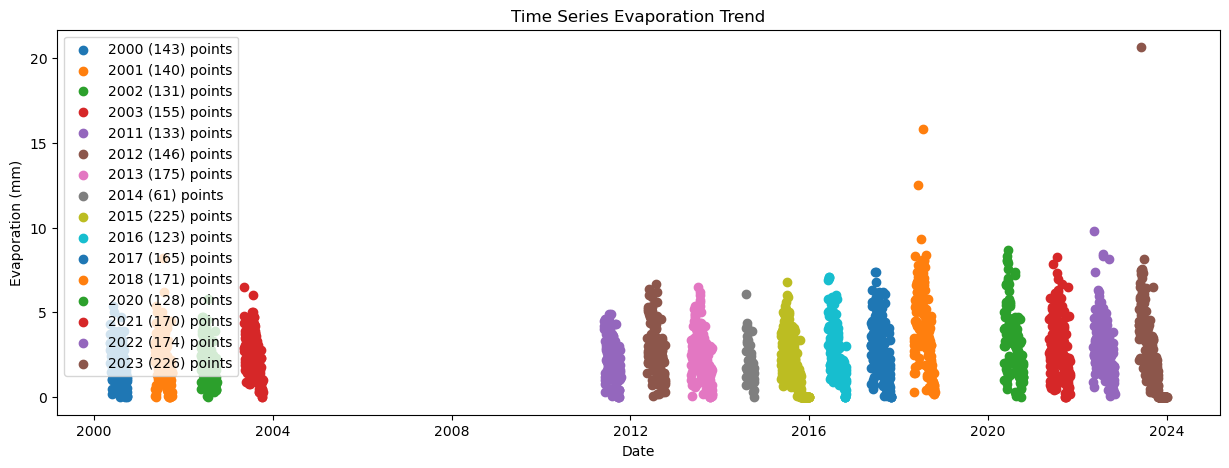

In [8]:
# Draw the scatter plot of the evaporation witht respect to time
# Filter out rows where evaporation is not missing
valid_evap_data = dataset_copied.dropna(subset=['evaporation_mm'])

# Group the valid data by year
# valid_evap_data['Year'] = valid_evap_data['year']
grouped_evap_data = valid_evap_data.groupby('year')

# Draw the scatter plot of snow_depth_cm vs date
def scatter_evaporation_timeseries(dataset_name, file='images/evaporation_mm_trend.png'):
    fig, ax = plt.subplots(figsize=(15, 5))
    for year, group in dataset_name:
        ax.scatter(group['date'], group['evaporation_mm'], label=f'{year} ({len(group)}) points')    
    # Set plot title and labels
    ax.set(title="Time Series Evaporation Trend", xlabel="Date", ylabel="Evaporation (mm)")    
    # Add legend
    ax.legend()    
    plt.savefig(file)
    plt.show()
    
scatter_evaporation_timeseries(grouped_evap_data, 'images/evaporation_mm_missing_values')

### The above evaporation scatter plot shows there is missing data from 2004 - 2010 and 2019 which are in total 8 years. So, we can see at least 8 years data is fully missing. The majority of the evaporation value range from 0 to 10mm but there are three values which tend to be outliers and can be removed from the dataset. Two of them are in 2018 (12.5mm and 15.8mm) and one is in 2023 (20.6mm).

#### Remove the evaporation outliers (>10mm) from the dataset and redraw the scatter plot of evaporation timeseries

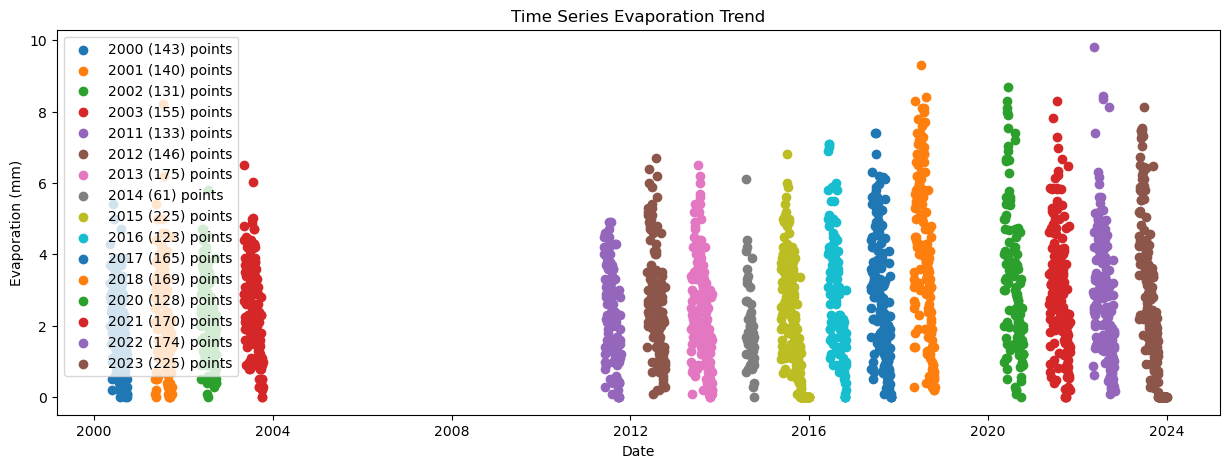

In [9]:
# Filter rows where 'evaporation_mm' is less than or equal to 10 and re-draw
dataset_copied = dataset_copied[(dataset_copied['evaporation_mm'] <= 10) | (pd.isna(dataset_copied['evaporation_mm']))]

# Filter out rows where evaporation is not missing
valid_evap_data = dataset_copied.dropna(subset=['evaporation_mm'])

# Group the valid data by year
grouped_evap_data = valid_evap_data.groupby('year')
# Redraw the evaporation_mm with time
scatter_evaporation_timeseries(grouped_evap_data, 'images/evaporation_mm_outliers_removed.png')

#### Fill the missing values of evaporation by the average of each same day throughout the years for non-empty values.

In [10]:
dataset_copied.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8853 entries, 0 to 8855
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   8853 non-null   int64         
 1   date                                 8853 non-null   datetime64[ns]
 2   mean_air_temperature_2m              8853 non-null   float64       
 3   min_air_temperature_2m               8853 non-null   float64       
 4   max_air_temperature_2m               8853 non-null   float64       
 5   relative_humidity                    8761 non-null   float64       
 6   air_pressure__2m_mbar                8819 non-null   float64       
 7   precipitation_mm                     8399 non-null   float64       
 8   evaporation_mm                       2463 non-null   float64       
 9   earth_heat_flux_MJ_m2                7888 non-null   float64       
 10  JT2              

In [11]:
dataset_copied.isna().sum()

ID                                        0
date                                      0
mean_air_temperature_2m                   0
min_air_temperature_2m                    0
max_air_temperature_2m                    0
relative_humidity                        92
air_pressure__2m_mbar                    34
precipitation_mm                        454
evaporation_mm                         6390
earth_heat_flux_MJ_m2                   965
JT2                                      96
JT5                                      94
JT10                                    157
JT20                                    170
JT50                                    324
radiation_balance_w_m2                  202
phosynthetic_active_radiation_mE_m2     427
albedo_RR_GR                            684
snow_depth_cm                          7534
JT100                                    95
year                                      0
month                                     0
day                             

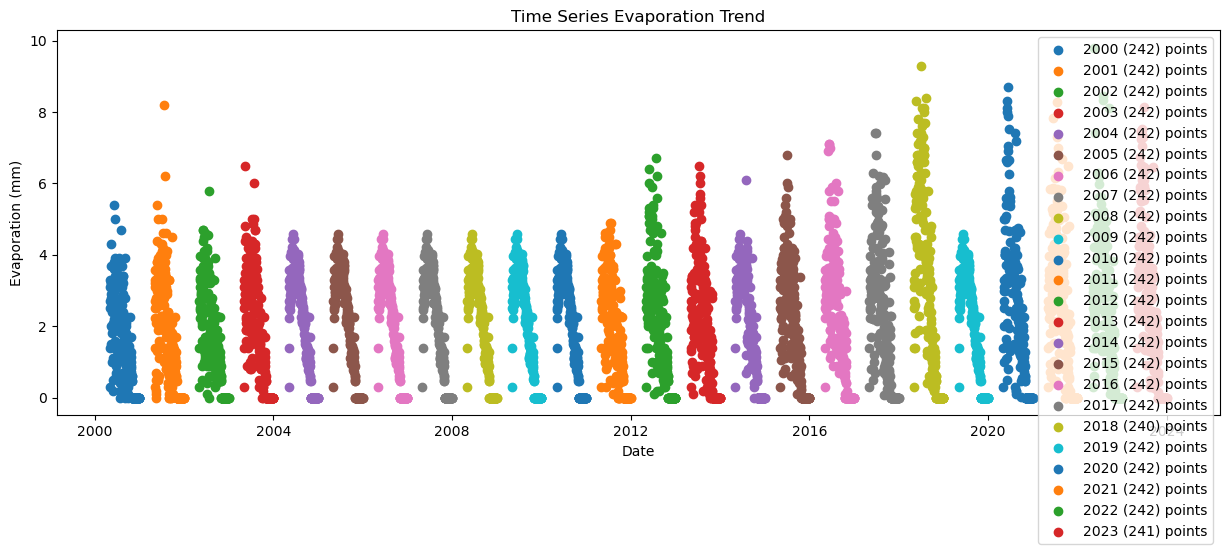

In [12]:
# Calculate the mean for evaporation_mm considering only non-NaN values for each day and month
mean_values = dataset_copied.groupby(['day', 'month'])['evaporation_mm'].apply(lambda x: x.dropna().mean()).reset_index(name='evaporation_mm_mean')

# Merge mean_values with the original DataFrame to fill missing values
dataset_copied = pd.merge(dataset_copied, mean_values, on=['day', 'month'], how='left')

# Fill missing values for evaporation_mm with the mean values calculated for the specific range of years
def fill_missing_evaporation(row):
    if pd.isna(row['evaporation_mm']):
        # Calculate the mean value for the specific range of years
        filtered_means = mean_values[(mean_values['day'] == row['day']) & (mean_values['month'] == row['month'])]
        mean_value = filtered_means['evaporation_mm_mean'].mean() if not filtered_means.empty else None
        return mean_value
    else:
        return row['evaporation_mm']

# Fill missing values for evaporation_mm with the mean values calculated for the specific range of years
dataset_copied['evaporation_mm'] = dataset_copied.apply(fill_missing_evaporation, axis=1)
# Drop auxiliary columns
dataset_copied.drop('evaporation_mm_mean', axis=1, inplace=True)
# Drop duplicates in case there are overlapping values from the merge
dataset_copied.drop_duplicates(inplace=True)

# Redraw the scatter plot for evaporation timeseries
# Filter out rows where evaporation is not missing
valid_evap_data = dataset_copied.dropna(subset=['evaporation_mm'])

# Group the valid data by year
grouped_evap_data = valid_evap_data.groupby('year')

# Draw the scatter plot of snow_depth_cm vs date
scatter_evaporation_timeseries(grouped_evap_data, 'images/evaporation_mm_missing_values_filled.png')

#### Let's count and draw the missing values based on monthes to see if the evaporation is missing for winter seasons

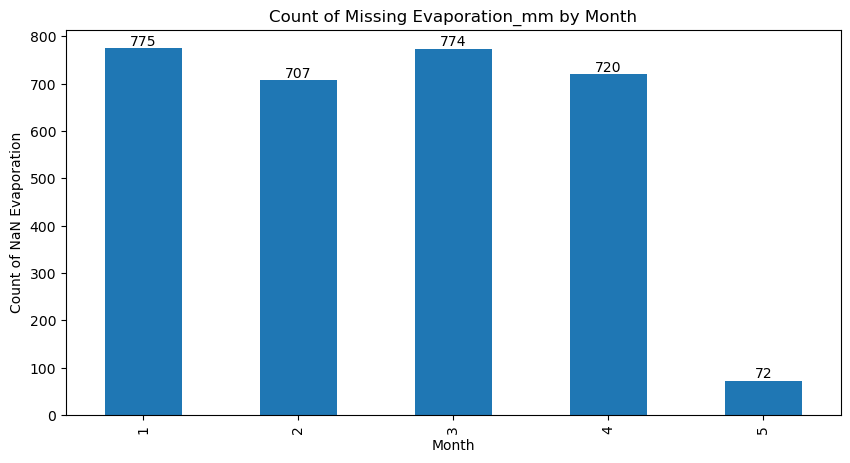

In [13]:
# Filter the dataframe to select rows where evaporation_mm is NaN
nan_evaporation = dataset_copied[dataset_copied['evaporation_mm'].isna()]

# Group by month and count NaN occurrenc
nan_evaporation_counts = nan_evaporation.groupby('month').size()

# Define the plot
fig, ax = plt.subplots(figsize=(10,5))
# Plotting the bar graph
nan_evaporation_counts.plot(kind='bar', ax=ax)

# Annotating each bar with its count value
for i, count in enumerate(nan_evaporation_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Setting labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Count of NaN Evaporation')
ax.set_title('Count of Missing Evaporation_mm by Month')
# Save the figure to a file (e.g., PNG, PDF, etc.)
plt.savefig('images/snow_depth_missing_count_by_month.png')  # Save as PNG format
# Displaying the plot
plt.show()

#### The above bargraph shows the missing evaporation measurements are mostly from January - April except few in May. This could be due to the winter season that evaporation is less likely. So, we can fill them all by zero value.

In [14]:
# Fill the missing evaporation_mm values by zero
dataset_copied['evaporation_mm'] = dataset_copied['evaporation_mm'].fillna(0.0)
dataset_copied.isna().sum()

ID                                        0
date                                      0
mean_air_temperature_2m                   0
min_air_temperature_2m                    0
max_air_temperature_2m                    0
relative_humidity                        92
air_pressure__2m_mbar                    34
precipitation_mm                        454
evaporation_mm                            0
earth_heat_flux_MJ_m2                   965
JT2                                      96
JT5                                      94
JT10                                    157
JT20                                    170
JT50                                    324
radiation_balance_w_m2                  202
phosynthetic_active_radiation_mE_m2     427
albedo_RR_GR                            684
snow_depth_cm                          7534
JT100                                    95
year                                      0
month                                     0
day                             

#### Draw Snow Depth(cm) vs Time to see the trend and missing values with time

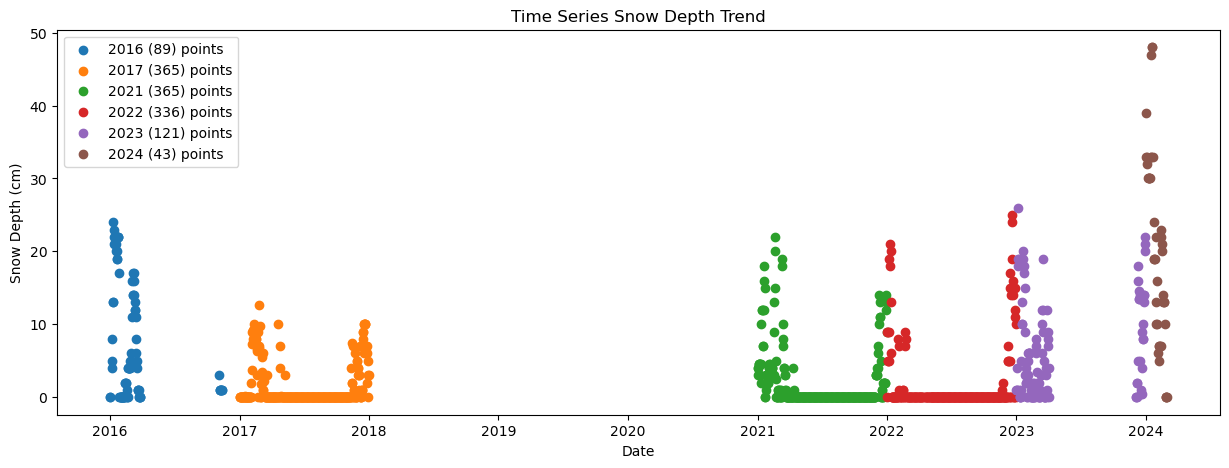

In [15]:
def scatter_snow_depth_timeseries(dataset_name, file='images/snow_depth_time_series.png'):
    # Draw the scatter plot of the evaporation witht respect to time
    # Filter out rows where snow_depth_cm is not missing
    valid_snow_data = dataset_name.dropna(subset=['snow_depth_cm'])
    
    # Group the valid data by year
    # valid_snow_data['Year'] = valid_snow_data['date'].dt.year
    grouped_snow_data = valid_snow_data.groupby('year')
    
    # Draw the scatter plot of snow_depth_cm vs date
    fig, ax = plt.subplots(figsize=(15, 5))
    for year, group in grouped_snow_data:
        ax.scatter(group['date'], group['snow_depth_cm'], label=f'{year} ({len(group)}) points')
    
    # Set plot title and labels
    ax.set(title="Time Series Snow Depth Trend", xlabel="Date", ylabel="Snow Depth (cm)")
    
    # Add legend
    ax.legend()
    # Save the figure to a file (e.g., PNG, PDF, etc.)
    plt.savefig(file)
    
    plt.show()
    
scatter_snow_depth_timeseries(dataset_copied, 'images/snow_depth_time_series_missing_values.png')

### The above snow depth scatter plot shows that snow data is completely missing from 2000-2015 and 2019. The daily snow depth ranges from 0 to about 50 cm.

### Some of the surface snow thickness values missing from the dataset are filled from the data gathered from MET Norway Frost API from 10/01/2026 - 29/03/2024

In [16]:
# Merge the two dataframes based on the 'date' column
snow_thickness = pd.read_csv('data/surface_snow_daily_2016_2024.csv')
snow_thickness['date'] = pd.to_datetime(snow_thickness['date'])
# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(dataset_copied, snow_thickness, on='date', suffixes=('_copied', '_thickness'), how='left')

# Copy values from 'snow_depth_cm_thickness' to 'snow_depth_cm_copied' where 'snow_depth_cm_copied' is NaN
merged_df['snow_depth_cm_copied'] = merged_df['snow_depth_cm_copied'].fillna(merged_df['snow_depth_cm_thickness'])

# Drop the 'snow_depth_cm_thickness' column
merged_df.drop(['snow_depth_cm_thickness','index','elementId','sourceId'], axis=1, inplace=True)

# If needed, you can rename the 'snow_depth_cm_copied' column back to 'snow_depth_cm'
merged_df.rename(columns={'snow_depth_cm_copied': 'snow_depth_cm'}, inplace=True)

# Now, merged_df contains the updated snow depth values in the dataset_copied dataframe

# To overwrite the original dataset_copied with the updated values:
dataset_copied = merged_df.copy()

In [17]:
# # Filter rows for April 01 - November 30
# mask = (dataset_copied['date'].dt.month >= 4) & (dataset_copied['date'].dt.month <= 11)  # Filter months April to November
# dataset_copied.loc[mask, 'snow_depth_mm'] = 0  # Set snow depth to zero for the filtered rows


In [18]:
dataset_copied.isna().sum()

ID                                        0
date                                      0
mean_air_temperature_2m                   0
min_air_temperature_2m                    0
max_air_temperature_2m                    0
relative_humidity                        92
air_pressure__2m_mbar                    34
precipitation_mm                        454
evaporation_mm                            0
earth_heat_flux_MJ_m2                   965
JT2                                      96
JT5                                      94
JT10                                    157
JT20                                    170
JT50                                    324
radiation_balance_w_m2                  202
phosynthetic_active_radiation_mE_m2     427
albedo_RR_GR                            684
snow_depth_cm                          6435
JT100                                    95
year                                      0
month                                     0
day                             

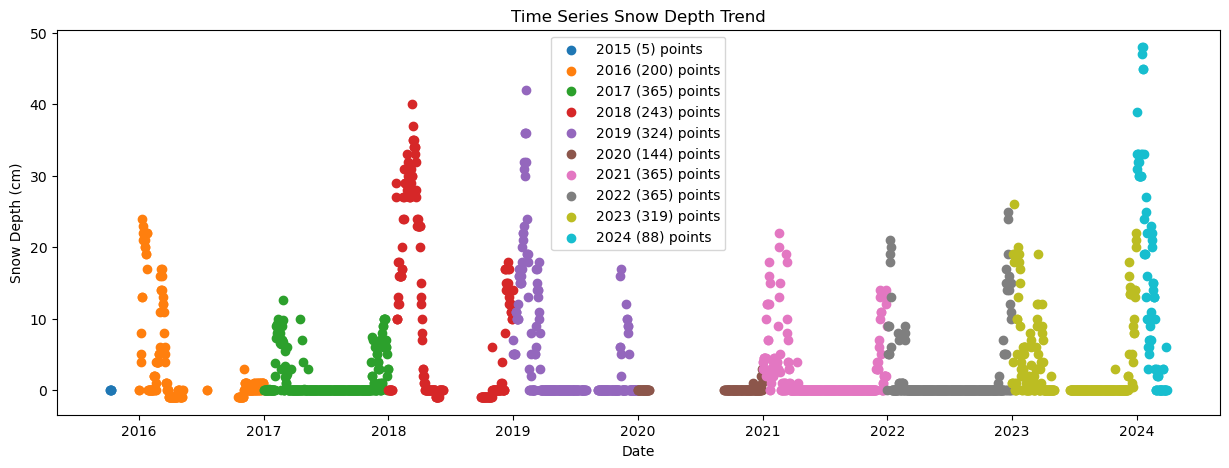

In [19]:
# Redraw the snow depth after some fillna
scatter_snow_depth_timeseries(dataset_copied, 'images/snow_depth_missing_values_filled_from_MET.png')

### Define a helper function that is used to do the following:
##### 1. Fill missing values for each month of the year with the mean value of that month for the same year.
##### 2. For months where the mean value is NaN (i.e., all values for that month in the same year are NaN), fill missing values with the mean value of that month across all other years. 

In [20]:
# Define a generic function that is used for filling missing values different columns
def fill_missing_values(row_data, dataset_passed, column_name):
    """
    Fill missing values for a specified column based on conditions.
    
    Parameters:
        row_data (pandas.Series): A single row_data of the DataFrame.
        dataset (pandas.DataFrame): The DataFrame containing the dataset.
        column_name (str): The name of the column to fill missing values for.
    
    Returns:
        float: The filled value for the specified column.
    """
    if pd.isna(row_data[column_name]):
        # Extract year and month from the current row_data
        year = row_data['year']
        month = row_data['month']
        
        # Check if there are any non-NaN values for the same month and year
        same_month_year = dataset_passed[(dataset_passed['year'] == year) & (dataset_passed['month'] == month)]
        valid_values = same_month_year.dropna(subset=[column_name])
        
        if not valid_values.empty:
            # Calculate the mean of non-NaN values for the same month and year
            mean_value = valid_values[column_name].mean()
        else:
            # Calculate the mean of non-NaN values for the same month in other years
            other_years = dataset_passed[(dataset_passed['month'] == month) & (dataset_passed['year'] != year)]
            other_years_valid_value = other_years.dropna(subset=[column_name])
            mean_value = other_years_valid_value[column_name].mean()
        
        return mean_value
    else:
        # If the value is not NaN, return the original value
        return row_data[column_name]

def fill_missing_by_monthly_mean(column_name, dataset_passed):
    dataset_passed[column_name] = dataset_passed.apply(lambda row_data: fill_missing_values(row_data, dataset_passed, column_name), axis=1)
    

### Fill missing values of all features using the helper function

In [21]:
%%time
# Fill the missing values for all features by the monthly mean of that specific year or mean value of that month across all other years if the month of that specific year is NaN
fill_missing_by_monthly_mean("evaporation_mm", dataset_copied)
fill_missing_by_monthly_mean("JT2", dataset_copied)
fill_missing_by_monthly_mean("JT5", dataset_copied)
fill_missing_by_monthly_mean("JT10", dataset_copied)
fill_missing_by_monthly_mean("JT20", dataset_copied)
fill_missing_by_monthly_mean("JT50", dataset_copied)
fill_missing_by_monthly_mean("JT100", dataset_copied)
fill_missing_by_monthly_mean("relative_humidity", dataset_copied)
fill_missing_by_monthly_mean("air_pressure__2m_mbar", dataset_copied)
fill_missing_by_monthly_mean("radiation_balance_w_m2", dataset_copied)
fill_missing_by_monthly_mean("albedo_RR_GR", dataset_copied)
fill_missing_by_monthly_mean("earth_heat_flux_MJ_m2", dataset_copied)
fill_missing_by_monthly_mean("precipitation_mm", dataset_copied)
fill_missing_by_monthly_mean("snow_depth_cm", dataset_copied)
fill_missing_by_monthly_mean("phosynthetic_active_radiation_mE_m2", dataset_copied)

CPU times: total: 21.5 s
Wall time: 34.2 s


In [22]:
dataset_copied.isna().sum()

ID                                     0
date                                   0
mean_air_temperature_2m                0
min_air_temperature_2m                 0
max_air_temperature_2m                 0
relative_humidity                      0
air_pressure__2m_mbar                  0
precipitation_mm                       0
evaporation_mm                         0
earth_heat_flux_MJ_m2                  0
JT2                                    0
JT5                                    0
JT10                                   0
JT20                                   0
JT50                                   0
radiation_balance_w_m2                 0
phosynthetic_active_radiation_mE_m2    0
albedo_RR_GR                           0
snow_depth_cm                          0
JT100                                  0
year                                   0
month                                  0
day                                    0
dtype: int64

### Soil temperature at 100cm with respect to time

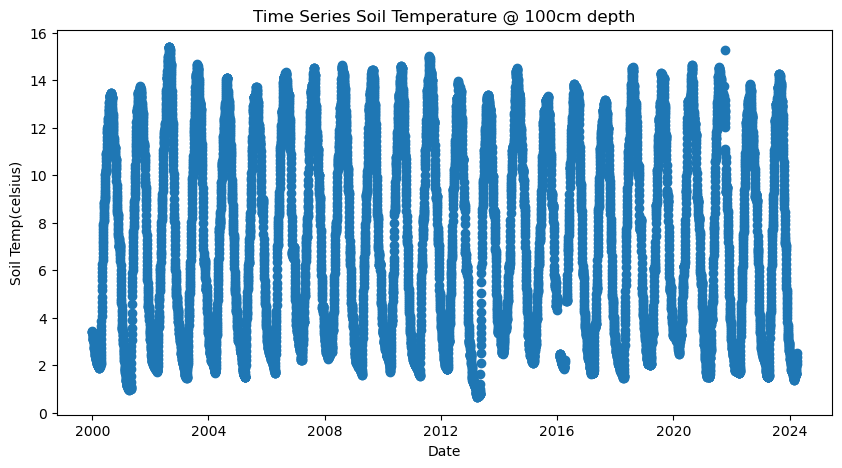

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(dataset["date"], dataset["JT100"]);
# ax.scatter(dataset["date"][1000:], dataset["JT100"][1000:]);
# Save the figure to a file (e.g., PNG, PDF, etc.)
ax.set(title="Time Series Soil Temperature @ 100cm depth", xlabel="Date", ylabel="Soil Temp(celsius)");
plt.savefig('images/soil_temperature_100cm_time_trend.png')  # Save as PNG format

#### The time series scatter chart shows that there is similar trend of increase and decrease every year except few times like at around 2016, it showed discontinuous nature  which is due to missing measurement errors. Overall, the dataset shows us that our data is a real timeseries data.

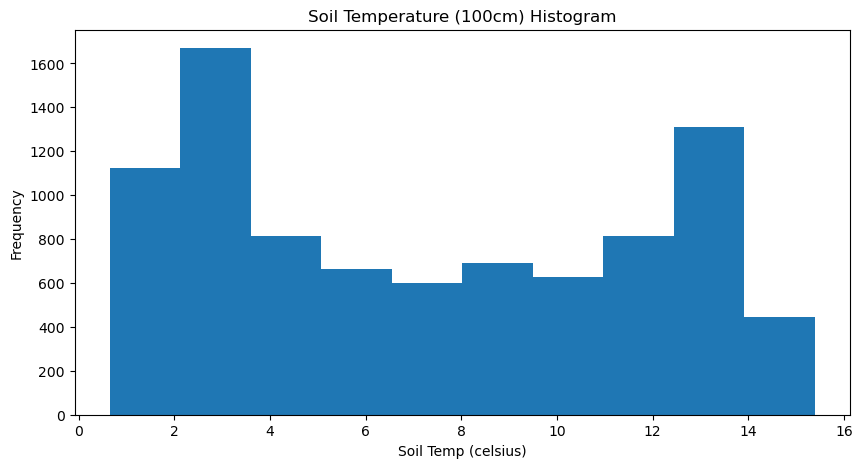

In [24]:
fig, ax = plt.subplots(figsize =(10,5))
ax.hist(dataset["JT100"]);
ax.set(title="Soil Temperature (100cm) Histogram", xlabel='Soil Temp (celsius)', ylabel="Frequency");

### Let's check the outliers by normalizing our features using the z-score method seeing the trend on the scatter plots

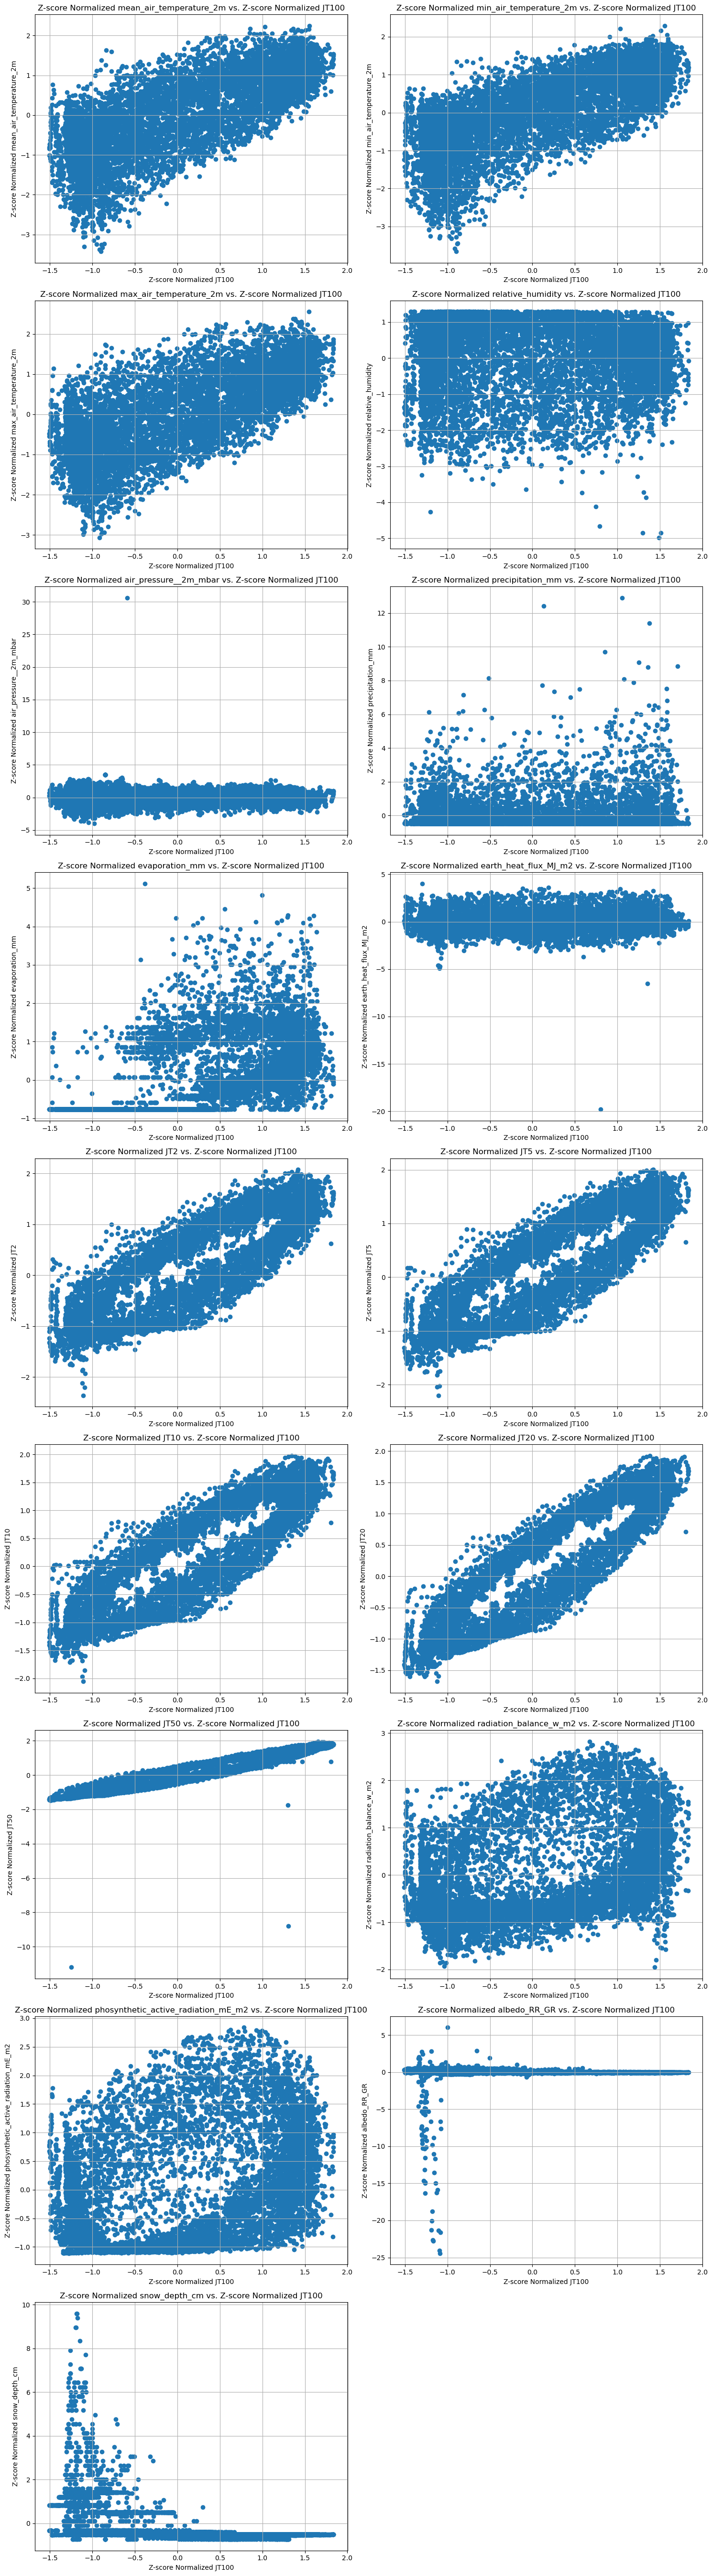

In [25]:
# Extract the features list from the dataset columns
features = dataset_copied.columns.tolist()
# remove the JT100 feature from the features list
features.remove('JT100')
# reomve the date feature from the features list
features.remove('date')
# reomve the year feature from the features list
features.remove('year')
# remove the month feature from the features list
features.remove('month')
# reomve the day feature from the features list
features.remove('day')
# reomve the ID from the features list
features.remove('ID')

# Calculate Z-score for the target variable 'JT100'
zscore_JT100 = (dataset_copied['JT100'] - dataset_copied['JT100'].mean()) / dataset_copied['JT100'].std()

# Calculate Z-score for all features
zscore_df = (dataset_copied[features] - dataset_copied[features].mean()) / dataset_copied[features].std()

# Calculate the number of rows needed for the subplot grid
num_features = len(features)
num_cols = 2  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Plot z-score normalized features against z-score normalized 'JT100' individually
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
        
    ax.scatter(zscore_JT100, zscore_df[feature])
    ax.set_title(f'Z-score Normalized {feature} vs. Z-score Normalized JT100')
    ax.set_xlabel('Z-score Normalized JT100')
    ax.set_ylabel(f'Z-score Normalized {feature}')
    ax.grid(True)

# Hide any empty subplots
for i in range(num_features, num_rows * num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

### The scatter plots above show that there are outliers for some of the features. To remove the outliers, let's first normalize our dataset values to create new normalized dataset

### Define a custom scatter_plot function that takes the features and dataset and plots one feature against the other

In [26]:
def scatter_plot(features, df):
    # Calculate the number of rows needed for the subplot grid
    num_features = len(features)
    num_cols = 2  # Number of columns for subplots
    num_rows = (num_features + num_cols - 1) // num_cols
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
    
    # Plot z-score normalized features against z-score normalized 'JT100' individually
    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        ax.scatter(df['JT100'], df[feature])
        ax.set_title(f'Z-score Normalized {feature} vs. Z-score Normalized JT100')
        ax.set_xlabel('Z-score Normalized JT100')
        ax.set_ylabel(f'Z-score Normalized {feature}')
        ax.grid(True)
    
    # Hide any empty subplots
    for i in range(num_features, num_rows * num_cols):
        axs.flatten()[i].axis('off')
    
    plt.tight_layout()
    plt.show()

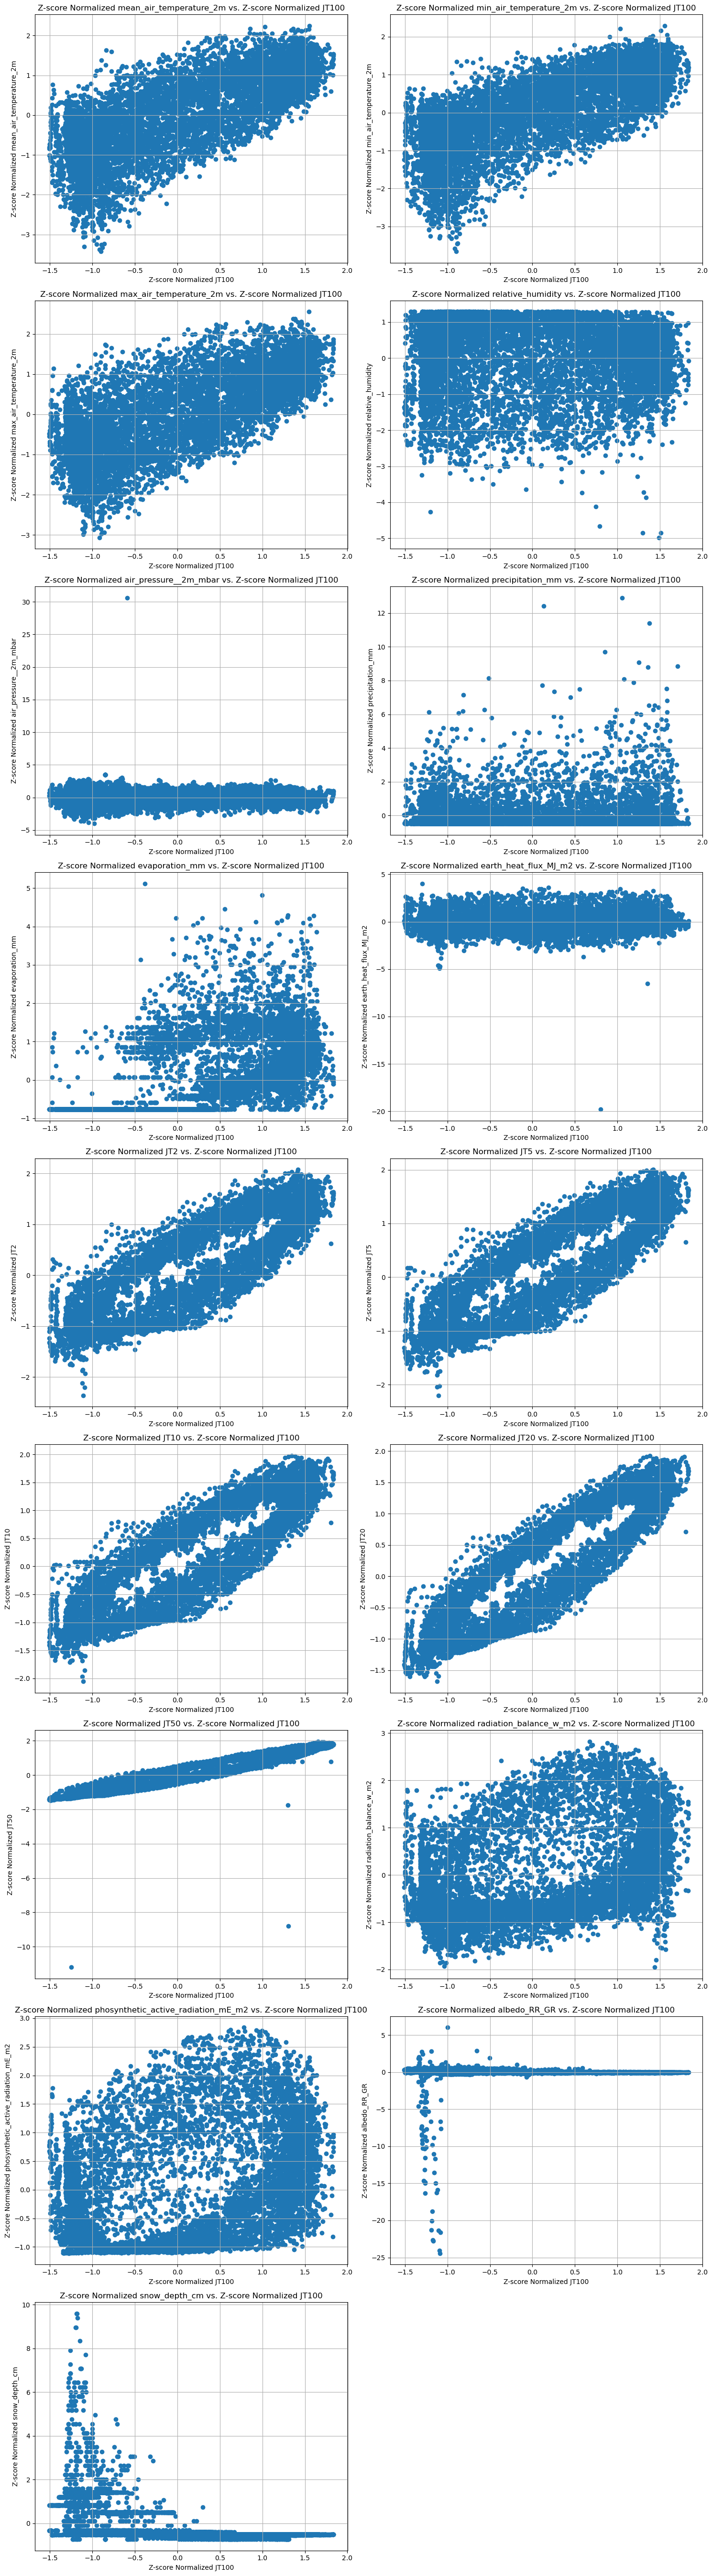

In [27]:
# Extract the features list from the dataset columns
features = dataset_copied.columns.tolist()

# Create a local copy of the dataset and drop the date and year features
score_local_dataset = dataset_copied.drop(['ID','date', 'year'], axis=1)

# Temporary reomve the ID from the features list
features.remove('ID')
# reomve the date feature from the features list
features.remove('date')
# reomve the year feature from the features list
features.remove('year')


# Calculate Z-score for all features
zscore_df = (score_local_dataset[features] - score_local_dataset[features].mean()) / score_local_dataset[features].std()

# Create a new DataFrame to store the normalized values
dataset_normalized = zscore_df.copy()
# copy the ID column from the original dataset to the dataset_normalized
dataset_normalized['ID'] = dataset_copied['ID']
dataset_normalized.to_csv('data/dataset_normalized.csv', index=False)

# # Normalize each feature by its corresponding z-score value
# for feature in features:
#     zscore_feature = zscore_df[feature]
#     dataset_normalized[feature] = dataset_copied[feature] / zscore_feature


# remove the month feature from the features list
features.remove('month')
# reomve the day feature from the features list
features.remove('day')
# reomve the JT100 feature from the features list
features.remove('JT100')
# Call the custom built scatter plot for multiple features
scatter_plot(features, dataset_normalized)

### Let's check any outliers on our dataset using statistical Z-score and Interquartile Range (IQR) techniques for all the features
#### 1. Z-score: Calculate the z-score for each data point, which represents how many standard deviations it is away from the mean. Data points with a z-score beyond a certain threshold can be considered outliers.
#### 2. IQR: IQR is the range between the first quartile (Q1) and the third quartile (Q3). Data points outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) are typically considered outliers.

In [28]:
dataset_normalized

mean_air_temperature_2m  min_air_temperature_2m  max_air_temperature_2m  \
0                   -1.421196               -1.268452               -1.519446   
1                   -0.725691               -0.928192               -0.717832   
2                   -0.542109               -0.441069               -0.651810   
3                   -0.587632               -0.712359               -0.674388   
4                   -0.737103               -0.759911               -0.674958   
...                       ...                     ...                     ...   
8848                -0.158446                0.012270               -0.274379   
8849                -0.070624                0.303575               -0.332875   
8850                -0.073353                0.207579               -0.335498   
8851                -0.041226                0.006916               -0.260468   
8852                 0.003677               -0.114960                0.077054   

      relative_humidity  air_pressure__2m_mbar  precipitation_mm  \
0              1.285254               0.127613         -0.166970   
1              0.493092              -0.180170         -0.166970   
2              0.493785              -0.676323          1.060733   
3             -0.980336              -1.034408         -0.104941   
4              1.162289              -0.528131         -0.261525   
...                 ...                    ...               ...   
8848           0.593586              -1.853649          0.850912   
8849           0.838961              -1.721640         -0.022648   
8850           0.895831              -0.783302         -0.125819   
8851           0.843677              -0.940582          0.034766   
8852          -0.444645              -0.783621         -0.470302   

      evaporation_mm  earth_heat_flux_MJ_m2       JT2       JT5  ...  \
0          -0.768851              -0.663885 -1.075192 -1.089966  ...   
1          -0.768851              -0.538766 -1.068014 -1.087616  ...   
2          -0.768851              -0.368291 -1.057533 -1.085120  ...   
3          -0.768851              -0.343267 -1.054662 -1.081155  ...   
4          -0.768851              -0.579430 -1.054662 -1.080127  ...   
...              ...                    ...       ...       ...  ...   
8848       -0.768851               0.704607 -0.822946 -0.883514  ...   
8849       -0.768851               0.972049 -0.633438 -0.698353  ...   
8850       -0.768851               0.779678 -0.553184 -0.591897  ...   
8851       -0.768851               0.649867 -0.445940 -0.482064  ...   
8852       -0.768851               0.986125 -0.420241 -0.445061  ...   

          JT20      JT50  radiation_balance_w_m2  \
0    -1.082421 -1.025002               -0.632418   
1    -1.081635 -1.024823               -1.055505   
2    -1.081321 -1.024823               -0.971942   
3    -1.078491 -1.016945               -1.586695   
4    -1.077391 -1.016050               -0.697321   
...        ...       ...                     ...   
8848 -1.003664 -1.138871               -0.516810   
8849 -0.879318 -1.089814               -0.549667   
8850 -0.766291 -1.011216               -0.483750   
8851 -0.659238 -0.929753               -0.604632   
8852 -0.597772 -0.855631                0.292450   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  \
0                               -1.050253      0.398850       1.410530   
1                               -1.026872      0.421822       1.410530   
2                               -1.074523      0.112527       1.410530   
3                               -0.981418      0.184723       1.410530   
4                               -1.023891     -0.068784       1.410530   
...                                   ...           ...            ...   
8848                            -1.100362     -0.306703      -0.522419   
8849                            -1.102088      2.821522      -0.522419   
8850                            -1.102036      0.573598     

#### Extract the outliers and histplot of each feature in the dataset_normalized
##### 1. Descriptive outlier detection is used to determine if there is a problem with the data, for example, if the data is not normally distributed.
##### 2. Prescriptive outlier detection is used to determine if a specific action needs to be taken
#### Z-Score is a measure of how many standard deviations a data point is away from the mean. Typically, data points with a Z-Score greater than a threshold are considered outliers

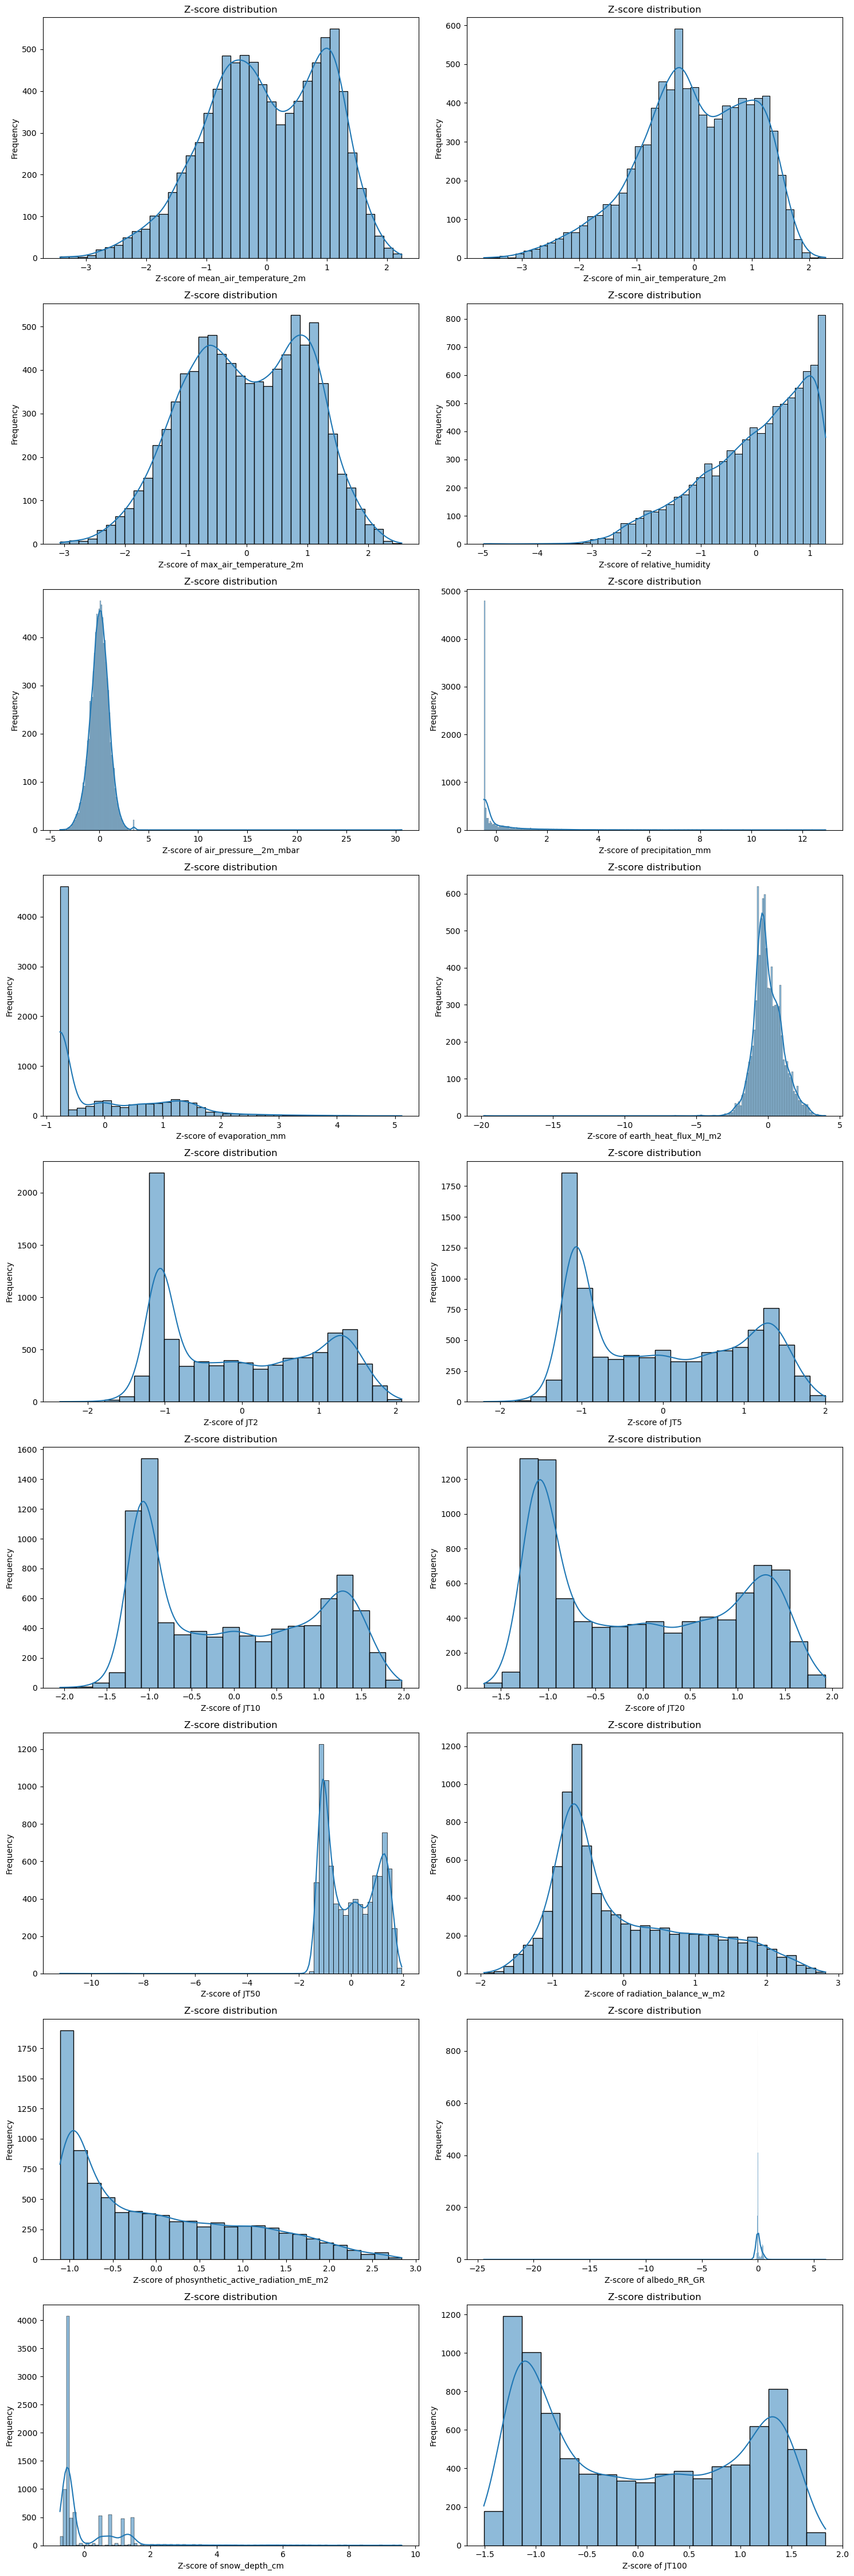

In [29]:
# Get the list of features from our dataset columns
features = dataset_normalized.columns.tolist()

# remove the month feature from the features list
features.remove('month')
# remove the day feature from the features list
features.remove('day')
# remove the ID from the features list
features.remove('ID')

# Define different Z-score thresholds for each feature
zscore_thresholds = {
    'mean_air_temperature_2m': (-4, 3),
    'min_air_temperature_2m': (-4, 3),
    'max_air_temperature_2m': (-4, 3),
    'relative_humidity': (-4, 2),
    'air_pressure__2m_mbar': (-5, 5),
    'precipitation_mm': (-1, 8),
    'evaporation_mm': (-1, 4),
    'earth_heat_flux_MJ_m2': (-5, 5),
    'JT2': (-2, 2.5),
    'JT5': (-2, 2.5),
    'JT10': (-2, 2.5),
    'JT20': (-2, 2.5),
    'JT50': (-2, 2.5),
    'radiation_balance_w_m2': (-2, 3),
    'phosynthetic_active_radiation_mE_m2': (-1.5, 3),
    'albedo_RR_GR': (-15, 5),
    'snow_depth_cm': (-1, 12),
    'JT100': (-2, 2.5)
}

# Plot histograms of Z-scores for all features
num_features = len(features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(zscore_df[feature], kde=True)
    plt.title('Z-score distribution')
    plt.xlabel(f'Z-score of {feature}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Identify outliers based on Z-score for all features using different thresholds
outliers_zscore_dict = {}
for feature in features:
    lower_threshold, upper_threshold = zscore_thresholds.get(feature)  
    if upper_threshold is None or lower_threshold is None:
        continue
    outliers_zscore = dataset_normalized[(dataset_normalized[feature]> upper_threshold) | (dataset_normalized[feature] < lower_threshold)]
    if not outliers_zscore.empty:
        outliers_zscore_dict[feature] = outliers_zscore[feature].tolist()

# Calculate IQR for all features
Q1 = dataset_normalized[features].quantile(0.25)
Q3 = dataset_normalized[features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR for all features
outliers_iqr_dict = {}
for feature in features:
    outliers_iqr = dataset_normalized[(dataset_normalized[feature] < Q1[feature] - 1.5 * IQR[feature]) | 
                                               (dataset_normalized[feature] > Q3[feature] + 1.5 * IQR[feature])]
    if not outliers_iqr.empty:
        outliers_iqr_dict[feature] = outliers_iqr[feature].tolist()


#### Remove the outliers for each feature and generate the filtered new dataset

In [30]:
outliers_zscore_dict

{'relative_humidity': [-4.265500002495809,
  -4.853830693296417,
  -4.97894546003039,
  -4.123254777123648,
  -4.659708613424803,
  -4.849045261531093],
 'air_pressure__2m_mbar': [30.631122307784707],
 'precipitation_mm': [12.40431146582039,
  8.841175181101628,
  11.395220135187147,
  8.089576121043763,
  8.141770500214447,
  12.908857131137012,
  8.802899303043123,
  9.081269325286778,
  9.690203748944768],
 'evaporation_mm': [4.1547825786322266,
  4.214826886869537,
  4.815269969242639,
  4.094738270394917,
  4.094738270394917,
  4.034693962157607,
  4.274871195106847,
  4.034693962157607,
  4.094738270394917,
  4.214826886869537,
  4.455004119818777,
  4.208822456045806,
  5.115491510429189,
  4.237043280917342,
  4.298888918401771,
  4.107948018207125,
  4.116354221360348],
 'earth_heat_flux_MJ_m2': [-6.502262382818106, -19.81025889124258],
 'JT2': [-2.2027643452729033, -2.360113357854394, -2.1176293412028087],
 'JT5': [-2.023549895592535, -2.2022495191595883, -2.0485120451458614]

In [31]:
outliers_iqr_dict

{'mean_air_temperature_2m': [-3.2475929609302585,
  -3.430679238712843,
  -3.3808142768777487,
  -3.239158091764123,
  -3.255903787902774,
  -3.32561550071701,
  -3.152824725004856,
  -3.300807061993083],
 'min_air_temperature_2m': [-2.951264127111565,
  -2.8836966613865282,
  -3.317148328301857,
  -2.949989269267696,
  -3.2801774508296666,
  -3.6600850883025133,
  -2.895170381981346,
  -3.5759444706071846,
  -3.155241382130543,
  -2.8671235094162366,
  -2.8339772054756525,
  -2.8875212349181343,
  -2.9334161172974045,
  -2.8339772054756525,
  -3.190937401758864,
  -3.0443287497139737,
  -2.9040943868884264,
  -3.017556734992733,
  -3.0048081565540463,
  -3.10297221053193,
  -3.4357101077816377,
  -3.4548329754396665,
  -2.881146945698791,
  -2.8671235094162366,
  -2.8467257839143385,
  -3.0315801712752872,
  -3.247031146889083,
  -3.0111824457733896,
  -2.9232172545464556,
  -3.2546802939522945,
  -3.0812996271861635,
  -3.0914984899371123,
  -2.9742115683012,
  -2.8378017790072585,
 

### Generate and save the outlier filtered normalized dataset

In [32]:
# Deifne the function to remove the outliers from the dataset
def remove_outliers(df, thresholds):
    """
    Removes outliers from a DataFrame based on z-score thresholds.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame (already z-score normalized).
        thresholds (dict): A dictionary containing feature names as keys and (lower, upper) z-score thresholds as values.
    
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    for feature, (lower, upper) in thresholds.items():
        df = df[(df[feature] >= lower) & (df[feature] <= upper)]
    
    return df

# The thresholds of the DataFrame normalized 'dataset_normalized' (already z-score normalized)
zscore_thresholds = {
    'mean_air_temperature_2m': (-4, 3),
    'min_air_temperature_2m': (-4, 3),
    'max_air_temperature_2m': (-4, 3),
    'relative_humidity': (-4, 2),
    'air_pressure__2m_mbar': (-5, 5),
    'precipitation_mm': (-1, 8),
    'evaporation_mm': (-1, 4),
    'earth_heat_flux_MJ_m2': (-5, 5),
    'JT2': (-2, 2.5),
    'JT5': (-2, 2.5),
    'JT10': (-2, 2.5),
    'JT20': (-2, 2.5),
    'JT50': (-2, 2.5),
    'radiation_balance_w_m2': (-2, 3),
    'phosynthetic_active_radiation_mE_m2': (-1.5, 3),
    'albedo_RR_GR': (-15, 5),
    'snow_depth_cm': (-1, 12),
    'JT100': (-2, 2.5)
}
# Remove the outliers and generate a new filtered dataset without outliers
dataset_normalized_outlier_filtered = remove_outliers(dataset_normalized, zscore_thresholds)
dataset_normalized_outlier_filtered.to_csv('data/dataset_normalized_outlier_filtered.csv', index=False)
#Show the new dataset
dataset_normalized_outlier_filtered

mean_air_temperature_2m  min_air_temperature_2m  max_air_temperature_2m  \
0                   -1.421196               -1.268452               -1.519446   
1                   -0.725691               -0.928192               -0.717832   
2                   -0.542109               -0.441069               -0.651810   
3                   -0.587632               -0.712359               -0.674388   
4                   -0.737103               -0.759911               -0.674958   
...                       ...                     ...                     ...   
8848                -0.158446                0.012270               -0.274379   
8849                -0.070624                0.303575               -0.332875   
8850                -0.073353                0.207579               -0.335498   
8851                -0.041226                0.006916               -0.260468   
8852                 0.003677               -0.114960                0.077054   

      relative_humidity  air_pressure__2m_mbar  precipitation_mm  \
0              1.285254               0.127613         -0.166970   
1              0.493092              -0.180170         -0.166970   
2              0.493785              -0.676323          1.060733   
3             -0.980336              -1.034408         -0.104941   
4              1.162289              -0.528131         -0.261525   
...                 ...                    ...               ...   
8848           0.593586              -1.853649          0.850912   
8849           0.838961              -1.721640         -0.022648   
8850           0.895831              -0.783302         -0.125819   
8851           0.843677              -0.940582          0.034766   
8852          -0.444645              -0.783621         -0.470302   

      evaporation_mm  earth_heat_flux_MJ_m2       JT2       JT5  ...  \
0          -0.768851              -0.663885 -1.075192 -1.089966  ...   
1          -0.768851              -0.538766 -1.068014 -1.087616  ...   
2          -0.768851              -0.368291 -1.057533 -1.085120  ...   
3          -0.768851              -0.343267 -1.054662 -1.081155  ...   
4          -0.768851              -0.579430 -1.054662 -1.080127  ...   
...              ...                    ...       ...       ...  ...   
8848       -0.768851               0.704607 -0.822946 -0.883514  ...   
8849       -0.768851               0.972049 -0.633438 -0.698353  ...   
8850       -0.768851               0.779678 -0.553184 -0.591897  ...   
8851       -0.768851               0.649867 -0.445940 -0.482064  ...   
8852       -0.768851               0.986125 -0.420241 -0.445061  ...   

          JT20      JT50  radiation_balance_w_m2  \
0    -1.082421 -1.025002               -0.632418   
1    -1.081635 -1.024823               -1.055505   
2    -1.081321 -1.024823               -0.971942   
3    -1.078491 -1.016945               -1.586695   
4    -1.077391 -1.016050               -0.697321   
...        ...       ...                     ...   
8848 -1.003664 -1.138871               -0.516810   
8849 -0.879318 -1.089814               -0.549667   
8850 -0.766291 -1.011216               -0.483750   
8851 -0.659238 -0.929753               -0.604632   
8852 -0.597772 -0.855631                0.292450   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  \
0                               -1.050253      0.398850       1.410530   
1                               -1.026872      0.421822       1.410530   
2                               -1.074523      0.112527       1.410530   
3                               -0.981418      0.184723       1.410530   
4                               -1.023891     -0.068784       1.410530   
...                                   ...           ...            ...   
8848                            -1.100362     -0.306703      -0.522419   
8849                            -1.102088      2.821522      -0.522419   
8850                            -1.102036      0.573598     

In [33]:
dataset_normalized

mean_air_temperature_2m  min_air_temperature_2m  max_air_temperature_2m  \
0                   -1.421196               -1.268452               -1.519446   
1                   -0.725691               -0.928192               -0.717832   
2                   -0.542109               -0.441069               -0.651810   
3                   -0.587632               -0.712359               -0.674388   
4                   -0.737103               -0.759911               -0.674958   
...                       ...                     ...                     ...   
8848                -0.158446                0.012270               -0.274379   
8849                -0.070624                0.303575               -0.332875   
8850                -0.073353                0.207579               -0.335498   
8851                -0.041226                0.006916               -0.260468   
8852                 0.003677               -0.114960                0.077054   

      relative_humidity  air_pressure__2m_mbar  precipitation_mm  \
0              1.285254               0.127613         -0.166970   
1              0.493092              -0.180170         -0.166970   
2              0.493785              -0.676323          1.060733   
3             -0.980336              -1.034408         -0.104941   
4              1.162289              -0.528131         -0.261525   
...                 ...                    ...               ...   
8848           0.593586              -1.853649          0.850912   
8849           0.838961              -1.721640         -0.022648   
8850           0.895831              -0.783302         -0.125819   
8851           0.843677              -0.940582          0.034766   
8852          -0.444645              -0.783621         -0.470302   

      evaporation_mm  earth_heat_flux_MJ_m2       JT2       JT5  ...  \
0          -0.768851              -0.663885 -1.075192 -1.089966  ...   
1          -0.768851              -0.538766 -1.068014 -1.087616  ...   
2          -0.768851              -0.368291 -1.057533 -1.085120  ...   
3          -0.768851              -0.343267 -1.054662 -1.081155  ...   
4          -0.768851              -0.579430 -1.054662 -1.080127  ...   
...              ...                    ...       ...       ...  ...   
8848       -0.768851               0.704607 -0.822946 -0.883514  ...   
8849       -0.768851               0.972049 -0.633438 -0.698353  ...   
8850       -0.768851               0.779678 -0.553184 -0.591897  ...   
8851       -0.768851               0.649867 -0.445940 -0.482064  ...   
8852       -0.768851               0.986125 -0.420241 -0.445061  ...   

          JT20      JT50  radiation_balance_w_m2  \
0    -1.082421 -1.025002               -0.632418   
1    -1.081635 -1.024823               -1.055505   
2    -1.081321 -1.024823               -0.971942   
3    -1.078491 -1.016945               -1.586695   
4    -1.077391 -1.016050               -0.697321   
...        ...       ...                     ...   
8848 -1.003664 -1.138871               -0.516810   
8849 -0.879318 -1.089814               -0.549667   
8850 -0.766291 -1.011216               -0.483750   
8851 -0.659238 -0.929753               -0.604632   
8852 -0.597772 -0.855631                0.292450   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  \
0                               -1.050253      0.398850       1.410530   
1                               -1.026872      0.421822       1.410530   
2                               -1.074523      0.112527       1.410530   
3                               -0.981418      0.184723       1.410530   
4                               -1.023891     -0.068784       1.410530   
...                                   ...           ...            ...   
8848                            -1.100362     -0.306703      -0.522419   
8849                            -1.102088      2.821522      -0.522419   
8850                            -1.102036      0.573598     

In [34]:
dataset_copied

ID       date  mean_air_temperature_2m  min_air_temperature_2m  \
0        1 2000-01-01                   -4.958                  -7.620   
1        2 2000-01-02                    0.649                  -4.951   
2        3 2000-01-03                    2.129                  -1.130   
3        4 2000-01-04                    1.762                  -3.258   
4        5 2000-01-05                    0.557                  -3.631   
...    ...        ...                      ...                     ...   
8848  8852 2024-03-28                    5.222                   2.426   
8849  8853 2024-03-29                    5.930                   4.711   
8850  8854 2024-03-30                    5.908                   3.958   
8851  8855 2024-03-31                    6.167                   2.384   
8852  8856 2024-04-01                    6.529                   1.428   

      max_air_temperature_2m  relative_humidity  air_pressure__2m_mbar  \
0                     -3.021            100.000               1001.536   
1                      4.009             88.578                997.675   
2                      4.588             88.588                991.451   
3                      4.390             67.333                986.959   
4                      4.385             98.227                993.310   
...                      ...                ...                    ...   
8848                   7.898             90.027                976.682   
8849                   7.385             93.565                978.338   
8850                   7.362             94.385                990.109   
8851                   8.020             93.633                988.136   
8852                  10.980             75.057                990.105   

      precipitation_mm  evaporation_mm  earth_heat_flux_MJ_m2  ...   JT20  \
0             1.743478             0.0                 -0.272  ...  0.443   
1             1.743478             0.0                 -0.192  ...  0.448   
2             8.800000             0.0                 -0.083  ...  0.450   
3             2.100000             0.0                 -0.067  ...  0.468   
4             1.200000             0.0                 -0.218  ...  0.475   
...                ...             ...                    ...  ...    ...   
8848          7.594000             0.0                  0.603  ...  0.944   
8849          2.573000             0.0                  0.774  ...  1.735   
8850          1.980000             0.0                  0.651  ...  2.454   
8851          2.903000             0.0                  0.568  ...  3.135   
8852          0.000000             0.0                  0.783  ...  3.526   

       JT50  radiation_balance_w_m2  phosynthetic_active_radiation_mE_m2  \
0     1.872                  -0.122                                1.171   
1     1.873                  -2.208                                1.618   
2     1.873                  -1.796                                0.707   
3     1.917                  -4.827                                2.487   
4     1.922                  -0.442                                1.675   
...     ...                     ...                                  ...   
8848  1.236                   0.448                                0.213   
8849  1.510                   0.286                                0.180   
8850  1.949                   0.611                                0.181   
8851  2.404                   0.015                                0.176   
8852  2.818                   4.438                                0.245   

      albedo_RR_GR  snow_depth_cm  JT100  year  month  day  
0            0.739       9.172137  3.427  2000      1    1  
1            0.767       9.172137  3.406  2000      1    2  
2            0.390       9.172137  3.391  2000      1    3  
3            0.478       9.172137  3.393  2000      1    4  
4            0.169       9.172137  3.361  2000      1    5  
...            ...        

#### Redraw the scatter plot of the dataset filtered from outliers to see if the outliers are properly removed.

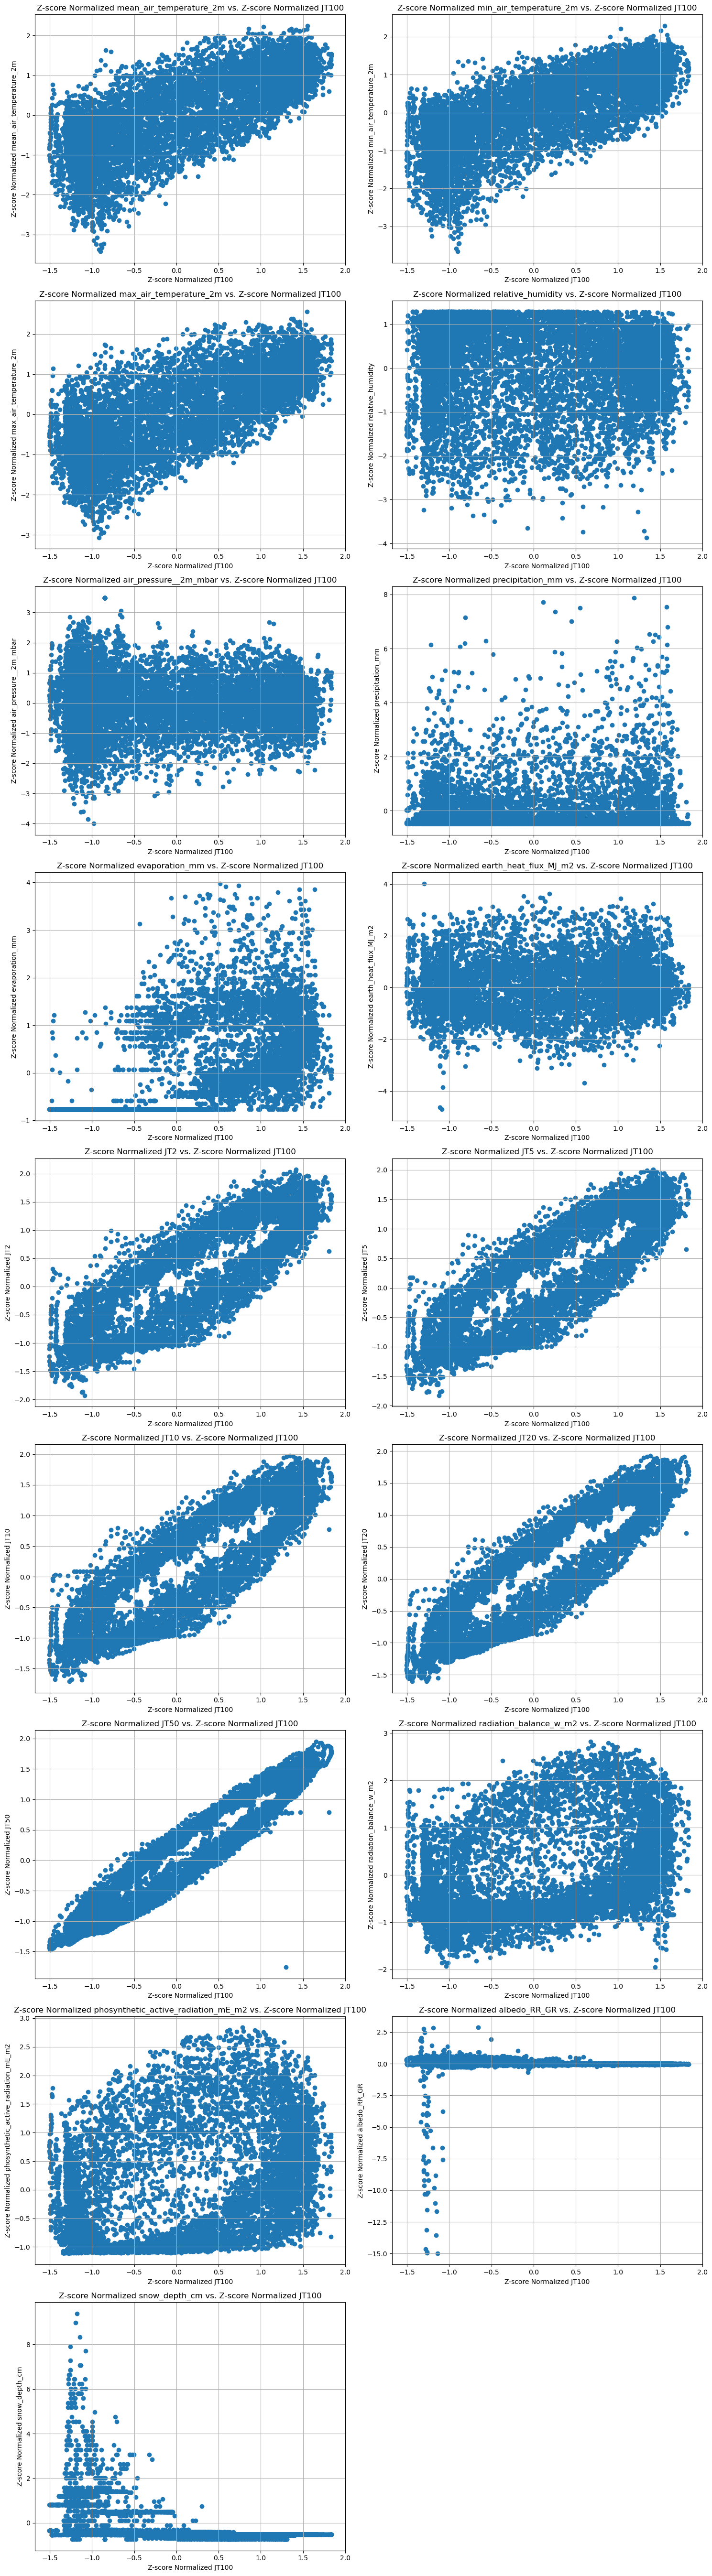

In [35]:
# Create the features list
features = dataset_normalized_outlier_filtered.columns.tolist()
# Remove the unncessary features day, month and JT100 from the plot
features.remove('day')
features.remove('month')
features.remove('JT100')
features.remove('ID')
# Call the scatter custom function created previously
scatter_plot(features, dataset_normalized_outlier_filtered)

### Now the data is filled for missing values and we have all numeric values, so we can start to design my model. We don't need any further data conversion as all my datatypes are numric but we don't need to have the time information in my final dataset so we should remove the date, year, month, day columns from my dataset.

In [36]:
dataset_normalized_outlier_filtered

mean_air_temperature_2m  min_air_temperature_2m  max_air_temperature_2m  \
0                   -1.421196               -1.268452               -1.519446   
1                   -0.725691               -0.928192               -0.717832   
2                   -0.542109               -0.441069               -0.651810   
3                   -0.587632               -0.712359               -0.674388   
4                   -0.737103               -0.759911               -0.674958   
...                       ...                     ...                     ...   
8848                -0.158446                0.012270               -0.274379   
8849                -0.070624                0.303575               -0.332875   
8850                -0.073353                0.207579               -0.335498   
8851                -0.041226                0.006916               -0.260468   
8852                 0.003677               -0.114960                0.077054   

      relative_humidity  air_pressure__2m_mbar  precipitation_mm  \
0              1.285254               0.127613         -0.166970   
1              0.493092              -0.180170         -0.166970   
2              0.493785              -0.676323          1.060733   
3             -0.980336              -1.034408         -0.104941   
4              1.162289              -0.528131         -0.261525   
...                 ...                    ...               ...   
8848           0.593586              -1.853649          0.850912   
8849           0.838961              -1.721640         -0.022648   
8850           0.895831              -0.783302         -0.125819   
8851           0.843677              -0.940582          0.034766   
8852          -0.444645              -0.783621         -0.470302   

      evaporation_mm  earth_heat_flux_MJ_m2       JT2       JT5  ...  \
0          -0.768851              -0.663885 -1.075192 -1.089966  ...   
1          -0.768851              -0.538766 -1.068014 -1.087616  ...   
2          -0.768851              -0.368291 -1.057533 -1.085120  ...   
3          -0.768851              -0.343267 -1.054662 -1.081155  ...   
4          -0.768851              -0.579430 -1.054662 -1.080127  ...   
...              ...                    ...       ...       ...  ...   
8848       -0.768851               0.704607 -0.822946 -0.883514  ...   
8849       -0.768851               0.972049 -0.633438 -0.698353  ...   
8850       -0.768851               0.779678 -0.553184 -0.591897  ...   
8851       -0.768851               0.649867 -0.445940 -0.482064  ...   
8852       -0.768851               0.986125 -0.420241 -0.445061  ...   

          JT20      JT50  radiation_balance_w_m2  \
0    -1.082421 -1.025002               -0.632418   
1    -1.081635 -1.024823               -1.055505   
2    -1.081321 -1.024823               -0.971942   
3    -1.078491 -1.016945               -1.586695   
4    -1.077391 -1.016050               -0.697321   
...        ...       ...                     ...   
8848 -1.003664 -1.138871               -0.516810   
8849 -0.879318 -1.089814               -0.549667   
8850 -0.766291 -1.011216               -0.483750   
8851 -0.659238 -0.929753               -0.604632   
8852 -0.597772 -0.855631                0.292450   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  \
0                               -1.050253      0.398850       1.410530   
1                               -1.026872      0.421822       1.410530   
2                               -1.074523      0.112527       1.410530   
3                               -0.981418      0.184723       1.410530   
4                               -1.023891     -0.068784       1.410530   
...                                   ...           ...            ...   
8848                            -1.100362     -0.306703      -0.522419   
8849                            -1.102088      2.821522      -0.522419   
8850                            -1.102036      0.573598     

In [37]:
dataset_normalized_outlier_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8801 entries, 0 to 8852
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   mean_air_temperature_2m              8801 non-null   float64
 1   min_air_temperature_2m               8801 non-null   float64
 2   max_air_temperature_2m               8801 non-null   float64
 3   relative_humidity                    8801 non-null   float64
 4   air_pressure__2m_mbar                8801 non-null   float64
 5   precipitation_mm                     8801 non-null   float64
 6   evaporation_mm                       8801 non-null   float64
 7   earth_heat_flux_MJ_m2                8801 non-null   float64
 8   JT2                                  8801 non-null   float64
 9   JT5                                  8801 non-null   float64
 10  JT10                                 8801 non-null   float64
 11  JT20                               

In [38]:
#### Let us check if our dataset is all numeric in addition to the info() method
for label, content in dataset_normalized_outlier_filtered.items():
    if not pd.api.types.is_numeric_dtype(content):
        print('Non-numeric column: ', label)

# 2. Modelling and Prediction Stage
## 2.1. Shuffling and Spliting the dataset into Train, Validation and Test sets

In [39]:
# Let us shuffle the entire dataset so that it is randomly arranged
np.random.seed(42)
dataset_shuffled = dataset_normalized_outlier_filtered.sample(frac=1)
# Split the dataset in to features (independent variables) and labels(dependent variable = target_soil_temperature_100cm ). Drop the ID as it is not a feature
X = dataset_shuffled.drop(['ID','JT100'], axis=1)
Y = dataset_shuffled["JT100"]
# Then split into train, validation and test sets
train_split = round(0.7*len(dataset_shuffled)) # 70% for train set
valid_split = round(train_split + 0.15*len(dataset_shuffled))
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid =X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]
# Save the X_test data to csv for future use
X_test.to_csv("data/test_data.csv", index=False)
# # Split the feature and label datasets in to 80/20 training and test datasets respectively
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

#### Let's build the evaluation metrics function

In [40]:
# Create evaluation metrics function that shows the metrics result of different metrics for a model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, max_error, explained_variance_score
def rmsle(Y_test, Y_preds):
    """
    Calculates the root mean squared log error between predictions and true labels
        
    Parameters:
        Y_test: A test dataset of the target label.
        Y_preds: The predicted values of the target label.
            
    Returns:
        float: the root mean squared log error of the model.
    """
    return np.sqrt(mean_squared_log_error(Y_test, Y_preds))

# Create function to evaluate model on few different levels
def show_scores(model, x_train, x_valid, y_train, y_valid):
    """
    Calculates and shows the different sklearn evaluation metrics
        
    Parameters:
        model: the model fitted.
        x_train: the input training set.
        x_valid: the input validation or test set.
        y_train: the target training set.
        y_valid: the target test set.
            
    Returns:
        scores: the dictionary of the calculated sklearn metrics for train and valid sets.
    """
    
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training Set R^2 Score": r2_score(y_train, train_preds),
              "Validation Set R^2 Score":r2_score(y_valid, val_preds),
              "Training Set MAE": mean_absolute_error(y_train, train_preds),
              "Validation Set MAE": mean_absolute_error(y_valid, val_preds),             
              "Training Set MSE": mean_squared_error(y_train, train_preds),
              "Validation Set MSE": mean_squared_error(y_valid, val_preds),
              "Training Set Median Absolute Error": median_absolute_error(y_train, train_preds),
              "Validation Set Median Absolute Error": median_absolute_error(y_valid, val_preds),
              "Training Set MA Percentage Error": mean_absolute_percentage_error(y_train, train_preds),
              "Validation Set MA Percentage Error": mean_absolute_percentage_error(y_valid, val_preds),
              "Training Set Max Error": max_error(y_train, train_preds),
              "Validation Set Max Error": max_error(y_valid, val_preds),
              "Training Set Explained Variance Score": explained_variance_score(y_train, train_preds),
              "Validation Set Explained Variance Score": explained_variance_score(y_valid, val_preds)}
    return scores

## 2.2. Fitting the models

### i. RandomForestRegressor Model data.

In [41]:
%%time
# Let's try another model which is ensemble RandomForestRegressor
# Import the model
from sklearn.ensemble import RandomForestRegressor
# Create rando forest model
rs_model = RandomForestRegressor(n_jobs=-1, random_state=42, oob_score=True)
rs_model.fit(X_train, Y_train)

# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
# Access the OOB Score
oob_score = rs_model.oob_score_
print('Out of Bag Score: ', oob_score)
show_scores(rs_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
Out of Bag Score:  0.9957537165271363
CPU times: total: 24 s
Wall time: 4.34 s


{'Training Set R^2 Score': 0.9994263151758577,
 'Validation Set R^2 Score': 0.9958770202743008,
 'Training Set MAE': 0.0168260366601298,
 'Validation Set MAE': 0.046791162883438986,
 'Training Set MSE': 0.000568959685899474,
 'Validation Set MSE': 0.004241090325766666,
 'Training Set Median Absolute Error': 0.011646623998901706,
 'Validation Set Median Absolute Error': 0.03163382875866588,
 'Training Set MA Percentage Error': 0.07583529938496937,
 'Validation Set MA Percentage Error': 0.21886628650451337,
 'Training Set Max Error': 0.21637389060523193,
 'Validation Set Max Error': 0.44512367706875205,
 'Training Set Explained Variance Score': 0.9994264163630691,
 'Validation Set Explained Variance Score': 0.995877140612741}

### ii. Ridge Model

In [42]:
%%time
# Import the model
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
# Instantiate and fit the model (on training set)
rg_model = Ridge()
rg_model.fit(X_train, Y_train)
# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
show_scores(rg_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
CPU times: total: 0 ns
Wall time: 32.1 ms


{'Training Set R^2 Score': 0.9798028133132386,
 'Validation Set R^2 Score': 0.9817988211149825,
 'Training Set MAE': 0.10923284241812624,
 'Validation Set MAE': 0.10599972971439836,
 'Training Set MSE': 0.0200308331504703,
 'Validation Set MSE': 0.018722586290114748,
 'Training Set Median Absolute Error': 0.09011549064635682,
 'Validation Set Median Absolute Error': 0.08622690389165866,
 'Training Set MA Percentage Error': 0.4736881789909898,
 'Validation Set MA Percentage Error': 0.5021045335953068,
 'Training Set Max Error': 0.9162942578281486,
 'Validation Set Max Error': 0.7793254976719677,
 'Training Set Explained Variance Score': 0.9798028133132386,
 'Validation Set Explained Variance Score': 0.9818027958407896}

### iii. Lasso Model

In [43]:
%%time
# Let's check the Lasso model
# Import the model
from sklearn.linear_model import Lasso
# Set up a radom seed
np.random.seed(42)
# Create rando forest model
la_model = Lasso()
la_model.fit(X_train, Y_train)

# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
show_scores(la_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
CPU times: total: 46.9 ms
Wall time: 24 ms


{'Training Set R^2 Score': 0.0,
 'Validation Set R^2 Score': -0.0009981210915628314,
 'Training Set MAE': 0.8994346461205194,
 'Validation Set MAE': 0.9148966134173727,
 'Training Set MSE': 0.9917635293038038,
 'Validation Set MSE': 1.0296736171197454,
 'Training Set Median Absolute Error': 0.9827443852182756,
 'Validation Set Median Absolute Error': 1.0124578161139972,
 'Training Set MA Percentage Error': 1.0064245911082255,
 'Validation Set MA Percentage Error': 1.0059991441991087,
 'Training Set Max Error': 1.8439272238820577,
 'Validation Set Max Error': 1.84415420934296,
 'Training Set Explained Variance Score': 0.0,
 'Validation Set Explained Variance Score': 0.0}

### iv. ElasticNet Model

In [44]:
%%time
# Let's check the ElasticNet model
# Import the model
from sklearn.linear_model import ElasticNet
# Set up a radom seed
np.random.seed(42)
# Create rando forest model
en_model = ElasticNet()
en_model.fit(X_train, Y_train)

# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
show_scores(en_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
CPU times: total: 62.5 ms
Wall time: 27 ms


{'Training Set R^2 Score': 0.5689336328816227,
 'Validation Set R^2 Score': 0.5694164821659413,
 'Training Set MAE': 0.5883388621338056,
 'Validation Set MAE': 0.5984525274329002,
 'Training Set MSE': 0.42751590161749103,
 'Validation Set MSE': 0.4429184020813809,
 'Training Set Median Absolute Error': 0.6329035615694492,
 'Validation Set Median Absolute Error': 0.6482611089896373,
 'Training Set MA Percentage Error': 0.9759214154974473,
 'Validation Set MA Percentage Error': 1.0162416342268947,
 'Training Set Max Error': 1.5285408088614454,
 'Validation Set Max Error': 1.247314656369905,
 'Training Set Explained Variance Score': 0.5689336328816228,
 'Validation Set Explained Variance Score': 0.5698993283640522}

### v. SVR with kernel 'linear' model

In [45]:
%%time
# Let's check the SVR with kernel linear model
# Import the model
from sklearn.svm import SVR
# Set up a radom seed
np.random.seed(42)
# Create rando forest model
svrl_model = SVR(kernel='linear')
svrl_model.fit(X_train, Y_train)

# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
show_scores(svrl_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
CPU times: total: 3.88 s
Wall time: 5.37 s


{'Training Set R^2 Score': 0.9793534987003284,
 'Validation Set R^2 Score': 0.9801885181446616,
 'Training Set MAE': 0.10702106156017983,
 'Validation Set MAE': 0.10480966745776746,
 'Training Set MSE': 0.020476446996737844,
 'Validation Set MSE': 0.0203790194533468,
 'Training Set Median Absolute Error': 0.08610722972995144,
 'Validation Set Median Absolute Error': 0.08416115350467901,
 'Training Set MA Percentage Error': 0.4761964502527299,
 'Validation Set MA Percentage Error': 0.48888445232359534,
 'Training Set Max Error': 1.0225816063104873,
 'Validation Set Max Error': 1.4411507705315367,
 'Training Set Explained Variance Score': 0.9793561567507719,
 'Validation Set Explained Variance Score': 0.9801896538809333}

### vi. SVR with kernel 'rbf' model

In [46]:
%%time
# Let's check the SVR with kernel 'rbf' model
# Import the model
from sklearn.svm import SVR
# Set up a radom seed
np.random.seed(42)
# Create rando forest model
svrr_model = SVR(kernel='rbf')
svrr_model.fit(X_train, Y_train)

# Show the scoring metrics for this model
print("The Evaluation Metrics Results:")
show_scores(svrr_model, X_train, X_valid, Y_train, Y_valid)

The Evaluation Metrics Results:
CPU times: total: 1.19 s
Wall time: 1.8 s


{'Training Set R^2 Score': 0.9937923915945207,
 'Validation Set R^2 Score': 0.992274112285964,
 'Training Set MAE': 0.062460360037977,
 'Validation Set MAE': 0.06893599363413883,
 'Training Set MSE': 0.0061564796207541125,
 'Validation Set MSE': 0.007947210469583736,
 'Training Set Median Absolute Error': 0.05487483472083876,
 'Validation Set Median Absolute Error': 0.05620463042174684,
 'Training Set MA Percentage Error': 0.26875568089968044,
 'Validation Set MA Percentage Error': 0.3891661254587898,
 'Training Set Max Error': 0.7751700872690337,
 'Validation Set Max Error': 0.6272903479248712,
 'Training Set Explained Variance Score': 0.9937933190127446,
 'Validation Set Explained Variance Score': 0.9922830395755333}

## 2.3. Hyperparameter Tuning with RandomizedSearchCV
### NB: This may take time. Turn it on when you need to run it.
#### To train a random forest, we need to specify the number of decision trees to use (the n_estimators parameter) and the maximum depth of each tree (the max_depth parameter). Other hyperparameters, such as the minimum number of samples required to split a node and the minimum number of samples required at a leaf node, can also be specified.

In [47]:
# %%time
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': np.arange(2,20,2),
#     'min_samples_leaf': np.arange(1, 20, 2),
#     'max_features': [0.5, 1, 'sqrt', 'log2', None]
# }

# # Instantiate the model with the RandomizeSearchCV
# rsv_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
#                                  param_distributions=param_grid, n_iter=20,
#                                  cv=5, verbose=0)

# # Fit the RandomizedSearchCV model to the train data
# rsv_model.fit(X_train, Y_train)
# Find the best model paramters from the fitted model
# rsv_model.best_params_
# Evaluate the RandomizedSearch model
# show_scores(rsv_model)


## 2.4. Hyperparameter tuning using GridSearchCV
### NB: Run it when required. This may take time so be patient

In [48]:
# %%time
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [1, 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # Perform Grid Search with cross-validation
# gsc_model = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search to the data
# gsc_model.fit(X_train, Y_train)

# # Get the best parameters and best score
# best_params = gsc_model.best_params_
# best_score = gsc_model.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

### Let's now train our model with the best hyperparameters estimated with the help of GridSearchCV

In [49]:
%%time
# The most ideal hyperparameters are
ideal_rs_model = RandomForestRegressor(n_estimators=300, 
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       max_features='sqrt',
                                       max_depth=20,
                                       bootstrap=False,
                                       random_state=42)
# Fit the ideal model
ideal_rs_model.fit(X_train, Y_train)
# Show the scores of the trained ideal RF model
show_scores(ideal_rs_model, X_train, X_valid, Y_train, Y_valid)

CPU times: total: 11.4 s
Wall time: 17.4 s


{'Training Set R^2 Score': 0.9999994778362992,
 'Validation Set R^2 Score': 0.9951948958970345,
 'Training Set MAE': 0.00036861342960622945,
 'Validation Set MAE': 0.050299005509134034,
 'Training Set MSE': 5.178629148447782e-07,
 'Validation Set MSE': 0.00494275545386855,
 'Training Set Median Absolute Error': 0.00015786330278833027,
 'Validation Set Median Absolute Error': 0.034225164622005866,
 'Training Set MA Percentage Error': 0.0010956680311732967,
 'Validation Set MA Percentage Error': 0.27425428774231325,
 'Training Set Max Error': 0.009752769637048964,
 'Validation Set Max Error': 0.33964883962291403,
 'Training Set Explained Variance Score': 0.9999994778362992,
 'Validation Set Explained Variance Score': 0.99519504028551}

In [50]:
# Show the scores from the default RF model
show_scores(rs_model, X_train, X_valid, Y_train, Y_valid)

{'Training Set R^2 Score': 0.9994263151758577,
 'Validation Set R^2 Score': 0.9958770202743008,
 'Training Set MAE': 0.016826036660129797,
 'Validation Set MAE': 0.046791162883438986,
 'Training Set MSE': 0.000568959685899474,
 'Validation Set MSE': 0.004241090325766665,
 'Training Set Median Absolute Error': 0.011646623998901706,
 'Validation Set Median Absolute Error': 0.03163382875866577,
 'Training Set MA Percentage Error': 0.07583529938496937,
 'Validation Set MA Percentage Error': 0.21886628650451337,
 'Training Set Max Error': 0.21637389060523193,
 'Validation Set Max Error': 0.44512367706875194,
 'Training Set Explained Variance Score': 0.9994264163630691,
 'Validation Set Explained Variance Score': 0.995877140612741}

## 2.5. Evaluating the model with cross-validation
#### The cross validation score will evaluate the model by taking K-number of folds or splits for the entire dataset. Let's take K = CV = 10 for this test as the dataset is not big enough. This helps us avoid lucky splits in case we consider only one random split pattern.


In [51]:
%%time
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score_r2 = cross_val_score(ideal_rs_model, X, Y, cv=10)
cross_val_score_r2

CPU times: total: 2min 32s
Wall time: 3min 43s


array([0.99468126, 0.99583901, 0.99556038, 0.99550658, 0.99593044,
       0.99557936, 0.99616635, 0.99547668, 0.99603727, 0.99470071])

## 2.6. Predictions on the test set (X_test, Y_test)

In [52]:
# Read the test data from file
test_data = pd.read_csv("data/test_data.csv")
Y_preds = ideal_rs_model.predict(test_data)

In [53]:
Y_preds

array([ 0.09545644, -0.72483249,  0.31049504, ...,  0.79742581,
        0.05245765, -0.81360271])

In [54]:
test_data

mean_air_temperature_2m  min_air_temperature_2m  max_air_temperature_2m  \
0                   -0.675454               -0.698718               -0.570623   
1                   -2.059021               -1.826840               -1.973162   
2                   -0.086626                0.352530               -0.463893   
3                    0.695460                0.772596                0.518341   
4                   -0.631171               -0.528652               -0.592060   
...                       ...                     ...                     ...   
1315                 0.468091                0.394090                0.449924   
1316                -0.089231               -0.584236                0.676839   
1317                -0.068143                0.167166               -0.060919   
1318                 0.687025                0.712677                0.619825   
1319                -0.667515               -0.309759               -0.885909   

      relative_humidity  air_pressure__2m_mbar  precipitation_mm  \
0             -1.282165              -0.469938         -0.231267   
1              1.104933               2.372736         -0.470302   
2              0.934808              -0.111614          0.347410   
3             -0.002651              -0.172119         -0.470302   
4             -0.601246              -2.242903         -0.470302   
...                 ...                    ...               ...   
1315           0.497461              -0.125485         -0.470302   
1316          -1.500214               1.268829         -0.470302   
1317           1.073516               0.139172         -0.418108   
1318          -0.244142               0.020475         -0.383311   
1319           1.285254              -0.981476         -0.364347   

      evaporation_mm  earth_heat_flux_MJ_m2       JT2       JT5      JT10  \
0          -0.002085              -1.619484 -1.028964 -0.995844 -0.951688   
1          -0.768851              -1.333273 -1.206412 -1.135485 -1.113827   
2          -0.002085              -0.683783 -0.228723 -0.225981 -0.214431   
3           0.311947              -0.718625  0.629087  0.666636  0.676141   
4          -0.768851              -0.071133 -1.073182 -1.091434 -1.141648   
...              ...                    ...       ...       ...       ...   
1315        0.792301               1.186316  0.753129  0.766631  0.800289   
1316       -0.768851               2.041819 -0.447232 -0.475456 -0.520462   
1317       -0.301773               1.226979  0.281800  0.300279  0.339447   
1318        1.238831               0.377733  0.724415  0.704373  0.699026   
1319       -0.768851              -0.412083 -0.948279 -0.956345 -0.979808   

          JT20      JT50  radiation_balance_w_m2  \
0    -0.834516 -0.354142               -0.875602   
1    -1.057741 -0.823046               -0.861367   
2    -0.205086  0.010740               -0.289649   
3     0.759810  0.867980               -0.446025   
4    -1.172183 -1.273688               -0.930769   
...        ...       ...                     ...   
1315  0.858532  0.912203               -0.331025   
1316 -0.575293 -0.721351               -0.219270   
1317  0.416956  0.544277               -0.570558   
1318  0.629491  0.439360                1.199672   
1319 -0.985900 -1.020884               -0.732004   

      phosynthetic_active_radiation_mE_m2  albedo_RR_GR  snow_depth_cm  \
0                               -0.613603      0.012437      -0.553171   
1                               -0.996953      0.182384       0.486251   
2                               -0.994442     -0.061400      -0.553171   
3                               -0.193482     -0.017918      -0.522419   
4                               -0.387746     -0.006432      -0.522419   
...                                   ...           ...            ...   
1315                             0.261527      0.005053      -0.524943   
1316                            -0.179595      0.081520       0.812563   


## Reverse the z-score normalized predicted values into unnormalized predicted original values
#### Step 1: Calculate the mean and standard deviation of each feature from the original dataset
#### Step 2: Reverse normalization for each feature in the predicted dataset
### Let's implement a generic function that reverses the z-score normalized data to unnormalized original data

In [55]:
# Define the reverse normalization function
def reverse_normalization(original_dataset, feature, test_set_series, model_name=None):
    """
    Reverses the normalized pandas series(target variable) to its corresponding unnormalized pandas series (target variable).
    It may reverse pandas series with predictions or simple denormalization of a pandas series depending on the model_name passed.
    
    parameters:
        original_dataset: the original unnormalized dataset 
        feature: the name of the column to be reversed
        model_name (optional): the name of the model to be used for prediction
        test_set_series: the test data to be used for predicting the target
    returns:
        unnormalized_predicted_series: the unnormalized pandas series of the target variable
    """
    # Exract the target variable from the original dataset
    original_series = original_dataset[feature]
    # Calculate the mean dand std of the original target variable
    mean = original_series.mean()
    std = original_series.std()
    if model_name != None:    
        # Predict the target from the test data using the ideal model generated
        normalized_predicted = model_name.predict(test_set_series)
        # Convert normalized_predicted_data to a pandas series
        normalized_predicted_series = pd.Series(normalized_predicted)
        # Update the test_set_series if the model exists otherwise normalize the unpredicted original series
        test_set_series = normalized_predicted_series
    # Calculate the unnormalized predicted series from the normalized predicted series using the mean an std
    unnormalized_predicted_series = (test_set_series * std) + mean
    return unnormalized_predicted_series

### Generate the unnormalized target values from the predicted values

In [56]:
# Intantiate the reverse normalization function
JT100_predicted_data = reverse_normalization(dataset_copied, 'JT100', X_test, ideal_rs_model)
JT100_predicted_data

0        7.722107
1        4.108268
2        8.669474
3       12.469197
4        1.753433
          ...    
1315    12.351470
1316     3.474337
1317    10.814681
1318     7.532673
1319     3.717185
Length: 1320, dtype: float64

### Sklearn Evaluation Functions
#### Some of the common evaluations functions are:
##### 1. r2_score
##### 2. mean_absolute_error
##### 3. mean_squared_error
##### 4. mean_absolute_percentage_error
##### 5. median_absolute_error
##### 6. max_error
##### 7. explained_variance_score
##### 8. OOB (out-of-bag) score is a performance metric for a machine learning model, specifically for ensemble models such as random forests. It is calculated using the samples that are not used in the training of the model, which is called out-of-bag samples. These samples are used to provide an unbiased estimate of the model’s performance, which is known as the OOB score.
##### 9. The validation score, on the other hand, is the performance of the model on a validation dataset. This dataset is different from the training dataset and is used to evaluate the model’s performance after it has been trained on the training dataset.
### Let's calculate the different metrics using the sklearn functions

In [57]:
# Import the evaluation functions sklearn metrics module
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error, max_error, explained_variance_score

np.random.seed(42)
# The soil temperature at 100cm (JT100) normalized predicted data 
JT100_normalized_predicted = ideal_rs_model.predict(X_test)

# Merge the two dataframes on the 'ID' column
merged_data = pd.merge(dataset_copied, dataset_normalized_outlier_filtered['ID'], on='ID', how='inner')

# Create a new dataframe containing only the rows from dataset_copied with 'ID' values found in dataset_normalized_outlier_filtered
data_unnormalized_outlier_filtered = dataset_copied[dataset_copied['ID'].isin(merged_data['ID'])]

# The soil temperature at 1000 cm (JT100) unnormalized predicted data
JT100_unnormalized_predicted= reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', X_test, ideal_rs_model)
# The soil temperature at 1000 cm (JT100) unnormalized original data
JT100_unnormalized_original = reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', Y_test)

# Evaluation of the normalized target values 
r2 = r2_score(Y_test, JT100_normalized_predicted)
# OOB_rf_score = ideal_rs_model.oob_score_
mean_abs_err = mean_absolute_error(Y_test, JT100_normalized_predicted) # Mean absolute error
mean_sqr_err =mean_squared_error(Y_test, JT100_normalized_predicted) # Mean Square error
mean_abs_per_err = mean_absolute_percentage_error(Y_test, JT100_normalized_predicted) # Mean absolute percentage error
median_abs_err = median_absolute_error(Y_test, JT100_normalized_predicted)
max_err = max_error(Y_test, JT100_normalized_predicted)
var_exp_err = explained_variance_score(Y_test, JT100_normalized_predicted)
# Evaluation of the unnormalized target values 
r2_unorm = r2_score(JT100_unnormalized_original, JT100_unnormalized_predicted)
mean_abs_err_unorm = mean_absolute_error(JT100_unnormalized_original, JT100_unnormalized_predicted)
mean_sqr_err_unorm = mean_squared_error(JT100_unnormalized_original, JT100_unnormalized_predicted)
mean_abs_per_err_unorm = mean_absolute_percentage_error(JT100_unnormalized_original, JT100_unnormalized_predicted)
median_abs_err_unorm = median_absolute_error(JT100_unnormalized_original, JT100_unnormalized_predicted)
max_err_unorm = max_error(JT100_unnormalized_original, JT100_unnormalized_predicted)
var_exp_err_unorm = explained_variance_score(JT100_unnormalized_original, JT100_unnormalized_predicted)

print("R^2 Score: Normalized: ", r2, "Denormalized: ", r2_unorm)
# print("Out-of-Bag Score: ", OOB_rf_score)
print("mean_absolute_error: Normalized: ",mean_abs_err, "Denormalized: ", mean_abs_err_unorm)
print("mean_squared_error: Normalized: ",mean_sqr_err, "Denormalized: ",mean_sqr_err_unorm)
print("mean_absolute_percentage_error: Normalized: ",mean_abs_per_err, "Denormalized: ",mean_abs_per_err_unorm)
print("median_abs_err: Normalized: ",median_abs_err, "Denormalized: ",median_abs_err_unorm)
print("max_err: Normalized: ",max_err, "Denormalized: ",max_err_unorm)
print("var_exp_err: Normalized: ",var_exp_err, "Denormalized: ",var_exp_err_unorm)

R^2 Score: Normalized:  0.9944100516292637 Denormalized:  0.9944100516292637
mean_absolute_error: Normalized:  0.05130304751509812 Denormalized:  0.22585138360202672
mean_squared_error: Normalized:  0.00557913773218221 Denormalized:  0.10812503623808804
mean_absolute_percentage_error: Normalized:  0.2618976806436123 Denormalized:  0.04186238670416238
median_abs_err: Normalized:  0.037014826297816716 Denormalized:  0.1629503535962531
max_err: Normalized:  0.849689429850988 Denormalized:  3.7405874048200953
var_exp_err: Normalized:  0.9944287445605906 Denormalized:  0.9944287445605906


#### Check the columns of the training and test datasets for matching

In [58]:
# Check if the columns of the trained dataset and test data match. If they don't match then the prediction won't work.
set(X_train.columns) - set(X_test.columns)
# If there is a difference in the columns, you need to manually adjust the missing columns

set()

## 2.8. Feature Importance Analysis

In [59]:
# Which features were most importance when predicting the target variable JT100 ( soil temperature at 100cm)
rs_model.feature_importances_

array([2.37713482e-04, 2.58891433e-04, 3.01975572e-04, 3.59086241e-04,
       4.79369802e-04, 1.64084349e-04, 4.52315991e-04, 7.15055627e-04,
       4.29955135e-04, 2.81511023e-04, 6.58440458e-04, 1.72579629e-03,
       9.00762781e-01, 7.60805649e-04, 6.14368402e-04, 4.58086190e-04,
       1.75894297e-03, 8.73035002e-02, 2.27731991e-03])

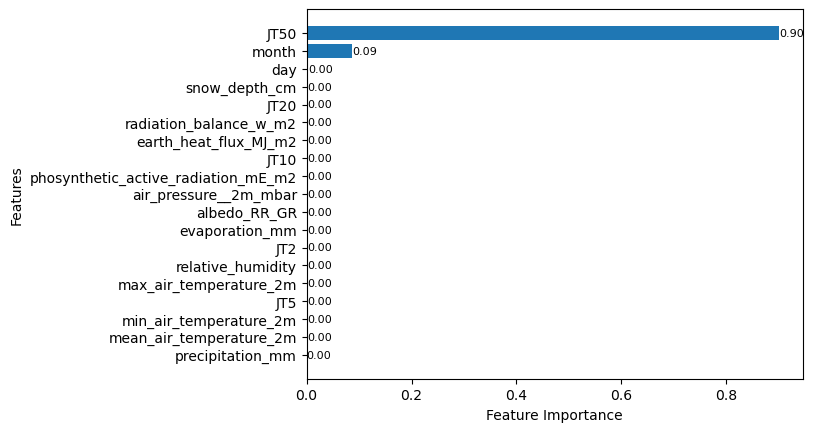

In [60]:
# Let's make a function for plotting feature importance
def plot_features(columns, importances, file, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    bars = ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

    # Add annotations on top of the bars
    for bar, importance in zip(bars, df['feature_importances'][:n]):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.2f}', 
                va='center', ha='left', fontsize=8, color='black')
    # Save the figure to a file (e.g., PNG, PDF, etc.)
    plt.savefig(file)  # Save as PNG format
plot_features(X_train.columns, rs_model.feature_importances_, 'images/JT100_feature_analysis.png')

#### NOTE:The feature importance analysis for our best model shows that the soil temperature at 100cm can be predicted from the dataset of the month (9% importance) and the soil temperature at 50cm (90% feature importance) which enables us to predict the target value almost 99% from these values.

## 2.9. Backward Attribute Selection

#### To check if the important features from our dataset (month, JT50 and JT100) can be used to train our model, we need to do the same process we have do before with only these two features considered.

In [61]:
# Generate the dataset of the two importance columns and the target variable
# Initialize the randome seed
np.random.seed(42)
selected_columns = ['month', 'JT50', 'JT100']
JT100_dataset_important_features = dataset_normalized_outlier_filtered[selected_columns]
# Split the dataset into train and validation set
# Let us shuffle the entire dataset so that it is randomly arranged
JT100_dataset_shuffled = JT100_dataset_important_features.sample(frac=1)
# Split the dataset in to features (independent variables) and labels(dependent variable = target_soil_temperature_100cm )
JT100_X = JT100_dataset_shuffled.drop("JT100", axis=1)
JT100_Y = JT100_dataset_shuffled["JT100"]
# Then split into train, validation and test sets
train_split = round(0.7*len(JT100_dataset_shuffled)) # 70% for train set
valid_split = round(train_split + 0.15*len(JT100_dataset_shuffled))
JT100_X_train, JT100_Y_train = JT100_X[:train_split], JT100_Y[:train_split]
JT100_X_valid, JT100_Y_valid =JT100_X[train_split:valid_split], JT100_Y[train_split:valid_split]
JT100_X_test, JT100_Y_test = JT100_X[valid_split:], JT100_Y[valid_split:]
# Save the X_test data to csv for future use
JT100_X_test.to_csv("data/optimized_test_data.csv", index=False)
print("JT100 Dataset with Important Features: \n")
JT100_dataset_important_features

JT100 Dataset with Important Features: 



month      JT50     JT100
0    -1.581592 -1.025002 -0.879470
1    -1.581592 -1.024823 -0.884237
2    -1.581592 -1.024823 -0.887642
3    -1.581592 -1.016945 -0.887188
4    -1.581592 -1.016050 -0.894451
...        ...       ...       ...
8848 -1.004042 -1.138871 -1.206556
8849 -1.004042 -1.089814 -1.191348
8850 -1.004042 -1.011216 -1.162521
8851 -1.004042 -0.929753 -1.125523
8852 -0.715267 -0.855631 -1.083530

[8801 rows x 3 columns]

In [62]:
# Fit the RF regressor model
ideal_rs_model.fit(JT100_X_train, JT100_Y_train);

In [63]:
# Show the scores
show_scores(ideal_rs_model, JT100_X_train, JT100_X_valid, JT100_Y_train, JT100_Y_valid)

{'Training Set R^2 Score': 0.9987834079015383,
 'Validation Set R^2 Score': 0.9855882644694318,
 'Training Set MAE': 0.01234724862557408,
 'Validation Set MAE': 0.08740683939445658,
 'Training Set MSE': 0.0012065716732934922,
 'Validation Set MSE': 0.01482458711965543,
 'Training Set Median Absolute Error': 1.8915455122225922e-06,
 'Validation Set Median Absolute Error': 0.06366031264040542,
 'Training Set MA Percentage Error': 0.05928842729052525,
 'Validation Set MA Percentage Error': 0.4411263659597312,
 'Training Set Max Error': 0.49589059672429964,
 'Validation Set Max Error': 0.7367009854320763,
 'Training Set Explained Variance Score': 0.9987834079015383,
 'Validation Set Explained Variance Score': 0.9856113628324398}

In [64]:
# Predict the target JT100 values from the test set
JT100_Y_test_preds = ideal_rs_model.predict(JT100_X_test)
JT100_Y_test_preds

array([ 0.13526737, -0.7115768 ,  0.41410047, ...,  0.82223962,
        0.04413044, -0.81573399])

## 2.9. Visualization of original and predicted JT100 values (Blue + Red = Purple)

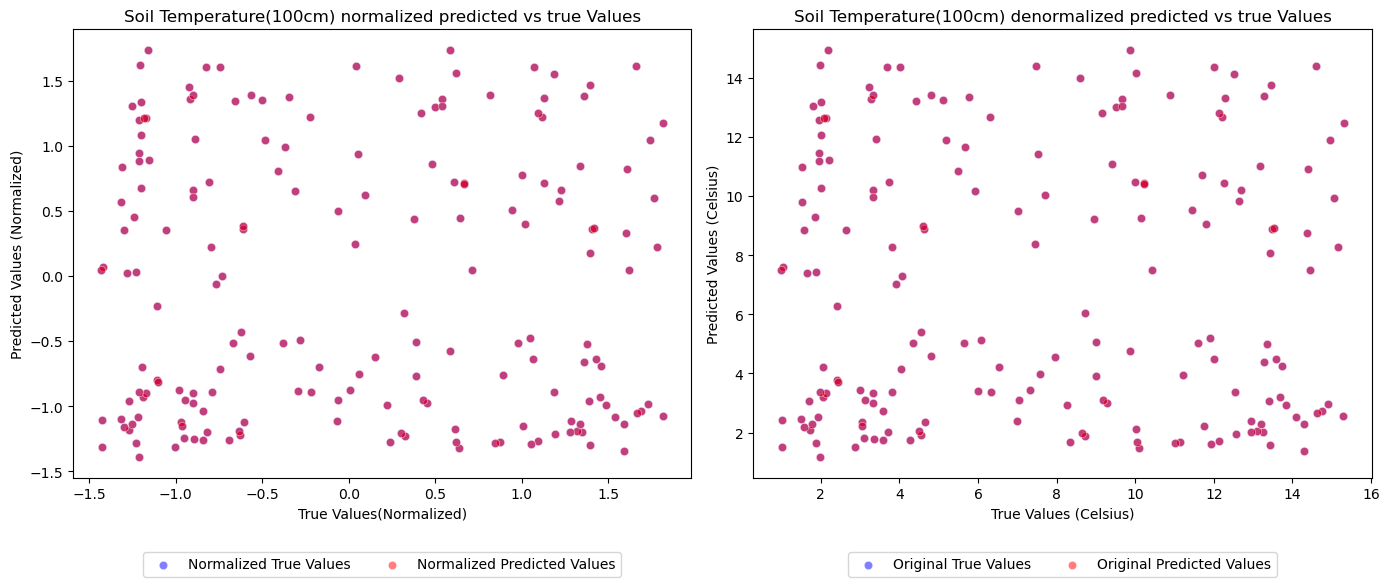

In [65]:
# Compare and Plot the predicted (JT100_Y_preds) and true (J100_Y_test) traget values
JT100_r2_score = r2_score(JT100_Y_test, JT100_Y_test_preds)
JT100_mae = mean_absolute_error(JT100_Y_test, JT100_Y_test_preds)
JT100_mse = mean_squared_error(JT100_Y_test, JT100_Y_test_preds)
# Convert pandas Series to numpy array
JT100_Y_test_preds_series = pd.Series(JT100_Y_test_preds)
JT100_normalized_df = pd.DataFrame({'Normalized True Values': JT100_Y_test, 'Normalized Predicted Values': JT100_Y_test_preds_series})

# Create the denormalized JT100 dataframe by using the denormalized outlier filtered original dataset
JT100_denormalized_df = pd.DataFrame({'Original True Values': reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', JT100_Y_test), 'Original Predicted Values': reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', JT100_Y_test_preds_series)})
# Create a figure with two subplots in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for true values
sns.scatterplot(data=JT100_normalized_df, x='Normalized True Values', y='Normalized Predicted Values', color='blue', label='Normalized True Values', alpha=0.5, ax=axes[0])

# Scatter plot for predicted values
sns.scatterplot(data=JT100_normalized_df, x='Normalized True Values', y='Normalized Predicted Values', color='red', label='Normalized Predicted Values', alpha=0.5, ax=axes[0])

# Scatter plot for denormalized true values
sns.scatterplot(data=JT100_denormalized_df, x='Original True Values', y='Original Predicted Values', color='blue', label='Original True Values', alpha=0.5, ax=axes[1])

# Scatter plot for denormalized predicted values
sns.scatterplot(data=JT100_denormalized_df, x='Original True Values', y='Original Predicted Values', color='red', label='Original Predicted Values', alpha=0.5, ax=axes[1])

# Set titles and labels for each subplot
axes[0].set_title('Soil Temperature(100cm) normalized predicted vs true Values')
axes[0].set_xlabel('True Values(Normalized)')
axes[0].set_ylabel('Predicted Values (Normalized)')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

axes[1].set_title('Soil Temperature(100cm) denormalized predicted vs true Values')
axes[1].set_xlabel('True Values (Celsius)')
axes[1].set_ylabel('Predicted Values (Celsius)')
# Move legend to the upper axis
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add annotations on hover for each subplot
mplcursors.cursor(hover=True)

# Adjust layout
plt.tight_layout()
# Save the figure to a file (e.g., PNG, PDF, etc.)
plt.savefig('images/True_values_vs_predicted_values_JT100.png')  # Save as PNG format
plt.show()

#### Note: The above scatter plots show that the true values and predicted values almost overlap which means the error is very small and the colors are mixing up and become indistinguishable

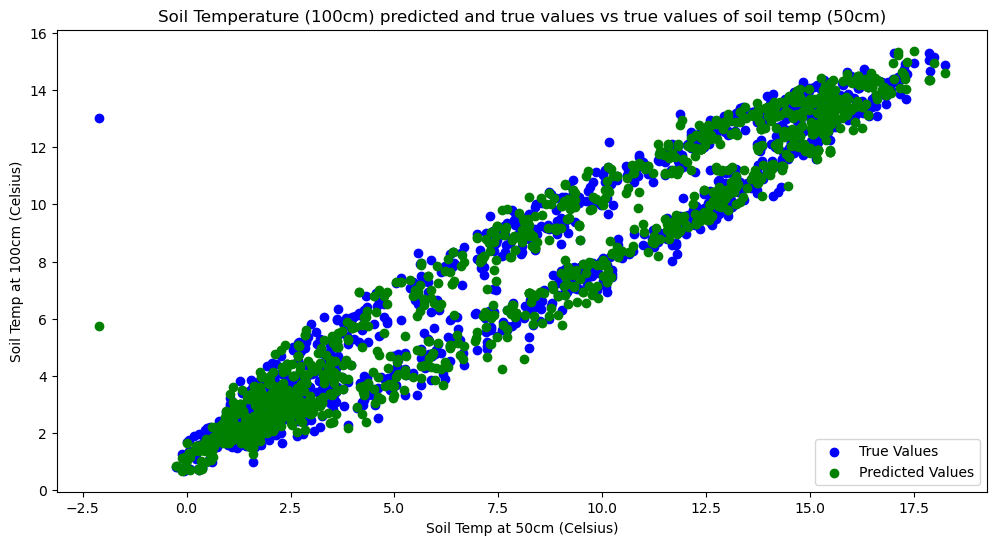

In [66]:
# Reverse the normalized JT50 values in the X test set
JT50_denormalized = reverse_normalization(data_unnormalized_outlier_filtered, 'JT50', JT100_X_test['JT50'])
# Reverse the normalized JT100 values in the Y test set
JT100_Y_test_denormalized = reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', JT100_Y_test)
# Reverse the normalized predicted JT100 values in the Y test set
JT100_Y_preds_denormalized = reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', JT100_Y_test_preds_series)
# Make the original and predicted series to have the same index
JT100_Y_preds_denormalized.index = JT100_Y_test_denormalized.index
JT50_denormalized.index = JT100_Y_test_denormalized.index

# Create true and predicted values dataframe for saving
JT100_true_and_predicted_values = pd.DataFrame({'JT50 Value':JT50_denormalized,'JT100 True Value':JT100_Y_test_denormalized, 'JT100 Predicted Value': JT100_Y_preds_denormalized})
# Save the True and Predicted Values to csv for further comparison
JT100_true_and_predicted_values.to_csv('data/JT100_Y_test_true_and_predicted_values.csv', index=False)
plt.figure(figsize=(12, 6)) 
plt.scatter(JT50_denormalized, JT100_Y_test_denormalized, color='blue', label='True Values') #plotting real points
plt.scatter(JT50_denormalized, JT100_Y_preds_denormalized , color='green', label='Predicted Values') #plotting for predicted points
   
plt.title("Soil Temperature (100cm) predicted and true values vs true values of soil temp (50cm)")
plt.xlabel('Soil Temp at 50cm (Celsius)')
plt.ylabel('Soil Temp at 100cm (Celsius)')
# Add legend
plt.legend(loc="lower right")
# Save the figure to a file (e.g., PNG, PDF, etc.)
plt.savefig('images/JT100_true_predicted_values_vs_JT50.png')  # Save as PNG format
plt.show()

### Note: The scatter plot above shows that as the JT50 temperature becomes more negative the JT100 prediction capacity becomes weaker because the model is not well trained with higher negative soil temperatures as our training dataset doesn't have enough higher negative temeperatures values.

In [67]:
JT100_Y_preds_denormalized

1393     7.891888
2908     4.163826
3585     9.119395
7558    11.939956
8081     1.773131
          ...    
5746    12.276673
5201     3.490926
5400    10.916145
865      7.490676
7294     3.705295
Length: 1320, dtype: float64

In [68]:
JT100_Y_test_denormalized

1393     7.960340
2908     4.097209
3585     8.333064
7558    12.486979
8081     1.777931
          ...    
5746    12.348082
5201     3.628557
5400    11.041053
865      7.319816
7294     3.635552
Name: JT100, Length: 1320, dtype: float64

In [69]:
# # Reverse the normalized JT50 values in the X test set
# JT50_denormalized = reverse_normalization(data_unnormalized_outlier_filtered, 'JT50', JT100_X_test['JT50'])
# X_grid = np.arange(min(JT50_denormalized),max(JT100_X_test),0.01)
# X_grid = X_grid.reshape(len(X_grid),1) 

# # Reverse the normalized JT100 values in the Y test set
# JT100_Y_test_denormalized = reverse_normalization(data_unnormalized_outlier_filtered, 'JT100', JT100_Y_test)
   
# plt.scatter(X, JT100_Y_test_denormalized, color='blue') #plotting real points
# plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points
   
# plt.title("Random Forest Regression Results")
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

### Visualizing a Single Decision Tree from the Random Forest Model
##### NB: Be patient this may take time. Uncomment and run it to see how the decision tree works but it may be difficult to see the trees due to size

In [70]:
# %%time
# from sklearn.tree import plot_tree
 
# # Let's take the ideal rf model trained
# # Let us pick on decision tree from the many estimators, e.g., the first tree (index 0)
# tree_to_plot = ideal_rs_model.estimators_[0]
 
# # Plot the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(tree_to_plot, feature_names=JT100_dataset_shuffled.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

### Define a function to calculate the minimum and maximum resolution of a dataset

In [71]:
# Define a function that calculates the minimum resolution and maximum difference of a dataframe column
def calculate_resolution_for_column(df, column_name):
    # Extract the specified column
    column_values = df[column_name]

    # Find the minimum and maximum values
    min_value = column_values.min()
    max_value = column_values.max()

    # Sort the values
    sorted_values = column_values.sort_values().values

    # Calculate the differences between adjacent values
    differences = sorted_values[1:] - sorted_values[:-1]

    # Find the smallest non-zero difference
    min_resolution = min(differences[differences > 0], default=None)

    # Find the largest difference
    max_resolution = max(differences)

    return min_resolution, max_resolution
min_resolution, max_resolution = calculate_resolution_for_column(data_unnormalized_outlier_filtered, 'JT100')
print('Minimum JT100 Resolution:', min_resolution, '\n Maximum Difference: ', max_resolution)

Minimum JT100 Resolution: 0.0002142857142857224 
 Maximum Difference:  0.06799999999999962


# 3. Prediction of the soil temperatures at different depths
## 3.1. Define a custom prediction function 
### The custom function can be adapted for all predicitons of soil temperatures at different soil depths

In [72]:
# Let us first predict the soil temperature at 50cm from all other independent variables except the JT100 (soil temp at 100cm)
# Define X_train_f outside of the function
X_train_f = None  
X_test_f = None 
Y_train_f = None
Y_test_f = None
def predict_feature(dataset_df, features_dropped, feature, model_type):
    new_dataset_normalized = dataset_df.drop(features_dropped, axis=1)
    X_f = new_dataset_normalized.drop(feature, axis=1)
    Y_f = new_dataset_normalized[feature]
    # Split the X and Y data in to train and test data
    X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X_f, Y_f, test_size=0.2)
    model_type.fit(X_train_f, Y_train_f)
    scores = show_scores(model_type, X_train_f, X_test_f, Y_train_f, Y_test_f)
    print(scores)
    return X_train_f, X_test_f, Y_train_f, Y_test_f

## 3.2. Prediction of Soil temperature at 50cm 
#### Consider all other independent variables in the original dataset with the JT100 (soil temp at 100cm) dropped out
#### Use the original dataset with outliers to see the effect of the outliers on the modelling
#### NB: This may take time. Be Patient!

In [73]:
%%time
# Instantiate the custom predict_feature function to predict the JT50 values
# Random Forest Regressor
print("Random Forest Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', rs_model)
print('\n')
# Ridge Regressor
print("Ridge Regressor Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', rg_model)
print('\n')
# Lasso Regressor
print("Lasso Regressor Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', la_model)
print('\n')
# ElasticNet Regressor
print("ElasticNet Regressor Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', en_model)
print('\n')
# SVR linear Regressor
print("SVR linear Regressor Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', svrl_model)
print('\n')
# SVR rbf Regressor
print("SVR rbf Regressor Metrics:")
predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', svrr_model)
print('\n')

Random Forest Metrics:
{'Training Set R^2 Score': 0.9970531233523681, 'Validation Set R^2 Score': 0.9342718962407048, 'Training Set MAE': 0.019717418070523973, 'Validation Set MAE': 0.057999115007182356, 'Training Set MSE': 0.0029568412979512036, 'Validation Set MSE': 0.06479078202919498, 'Training Set Median Absolute Error': 0.012710341743478848, 'Validation Set Median Absolute Error': 0.034523888629590216, 'Training Set MA Percentage Error': 0.9764266824971632, 'Validation Set MA Percentage Error': 0.3180338142645053, 'Training Set Max Error': 3.5806405820818448, 'Validation Set Max Error': 10.066963354231447, 'Training Set Explained Variance Score': 0.9970534270540428, 'Validation Set Explained Variance Score': 0.9342987991667528}


Ridge Regressor Metrics:
{'Training Set R^2 Score': 0.9721108330400849, 'Validation Set R^2 Score': 0.9325301919203044, 'Training Set MAE': 0.08090962529398005, 'Validation Set MAE': 0.08528913807913074, 'Training Set MSE': 0.027770606902819, 'Validation

## 3.3. Predictions of other soil temperatures (20cm, 10cm, 5cm, 2cm)
#### As the RandomForestRegressor is working good for the prediction let us consider RF to predict the soil temperatures.

In [74]:
# Instantiate the custom predict_feature function to predict the JT2, JT5, JT10, JT20 values
# Random Forest Regressor JT20
print("Random Forest Metrics JT20:")
predict_feature(dataset_normalized, ['JT100','JT50','ID'], 'JT20', rs_model)
print('\n')
# Random Forest Regressor JT10
print("Random Forest Metrics JT10:")
predict_feature(dataset_normalized, ['JT100','JT50','JT20','ID'], 'JT10', rs_model)
print('\n')
# Random Forest Regressor JT5
print("Random Forest Metrics JT5:")
predict_feature(dataset_normalized, ['JT100','JT50','JT20','JT10','ID'], 'JT5', rs_model)
print('\n')
# Random Forest Regressor JT2
print("Random Forest Metrics JT2:")
predict_feature(dataset_normalized, ['JT100','JT50','JT20','JT10','JT5','ID'], 'JT2', rs_model)
print('\n')

Random Forest Metrics JT20:
{'Training Set R^2 Score': 0.9996103021008538, 'Validation Set R^2 Score': 0.9975303964558874, 'Training Set MAE': 0.010460755675890073, 'Validation Set MAE': 0.026614421854274397, 'Training Set MSE': 0.0003890557475094484, 'Validation Set MSE': 0.0024844608758598286, 'Training Set Median Absolute Error': 0.006281727132168263, 'Validation Set Median Absolute Error': 0.015692175456343244, 'Training Set MA Percentage Error': 0.06246781475437702, 'Validation Set MA Percentage Error': 0.11972590063334396, 'Training Set Max Error': 0.39130947063259747, 'Validation Set Max Error': 0.9109738055514827, 'Training Set Explained Variance Score': 0.9996105128178857, 'Validation Set Explained Variance Score': 0.9975351794763443}


Random Forest Metrics JT10:
{'Training Set R^2 Score': 0.9998170910860645, 'Validation Set R^2 Score': 0.9979406247280629, 'Training Set MAE': 0.007864693701360679, 'Validation Set MAE': 0.020991537957020856, 'Training Set MSE': 0.0001832231328

### Let's visualize the feature importance for each of the soil temepratures JT2, JT5, JT10, JT20, JT50
#### JT2 Feature Importance analysis

{'Training Set R^2 Score': 0.9973593493024642, 'Validation Set R^2 Score': 0.9807255189308448, 'Training Set MAE': 0.03608854273448555, 'Validation Set MAE': 0.0970300950329444, 'Training Set MSE': 0.0026293429119306553, 'Validation Set MSE': 0.019578660594541285, 'Training Set Median Absolute Error': 0.02552665729721522, 'Validation Set Median Absolute Error': 0.06437157949276817, 'Training Set MA Percentage Error': 0.17857835774160158, 'Validation Set MA Percentage Error': 0.40409521620593286, 'Training Set Max Error': 0.38864513027406644, 'Validation Set Max Error': 0.7743319741371346, 'Training Set Explained Variance Score': 0.9973593992384294, 'Validation Set Explained Variance Score': 0.9807884303338907}


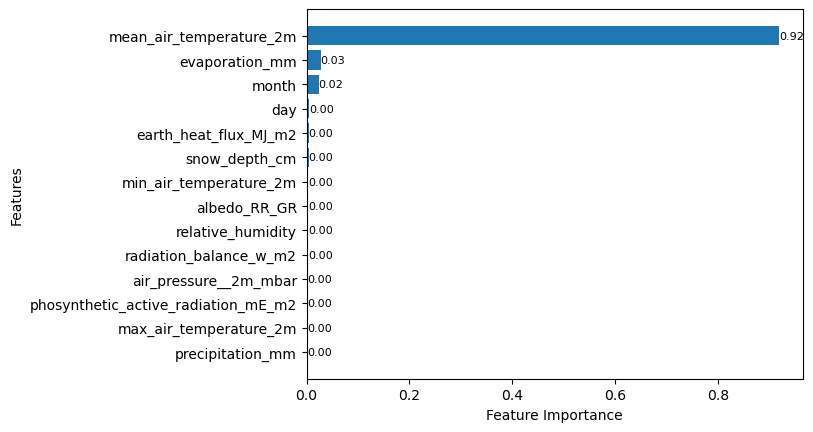

In [75]:
# Feature parameter analysis for JT2
X_train_f, X_test_f, Y_train_f, Y_test_f = predict_feature(dataset_normalized, ['JT100','JT50','JT20','JT10','JT5','ID'], 'JT2', rs_model)
plot_features(X_train_f.columns, rs_model.feature_importances_, 'images/JT2_feature_analysis.png')

#### JT5 Feature Importance analysis

{'Training Set R^2 Score': 0.9999416295094815, 'Validation Set R^2 Score': 0.9996493987063718, 'Training Set MAE': 0.00498590393734661, 'Validation Set MAE': 0.01265543125903376, 'Training Set MSE': 5.849122069952267e-05, 'Validation Set MSE': 0.0003474159786391609, 'Training Set Median Absolute Error': 0.0033184975288543667, 'Validation Set Median Absolute Error': 0.00866333425674326, 'Training Set MA Percentage Error': 0.021317229413592983, 'Validation Set MA Percentage Error': 0.0554894473909662, 'Training Set Max Error': 0.1375502542092637, 'Validation Set Max Error': 0.16758999865408564, 'Training Set Explained Variance Score': 0.9999416428126107, 'Validation Set Explained Variance Score': 0.9996501204204031}


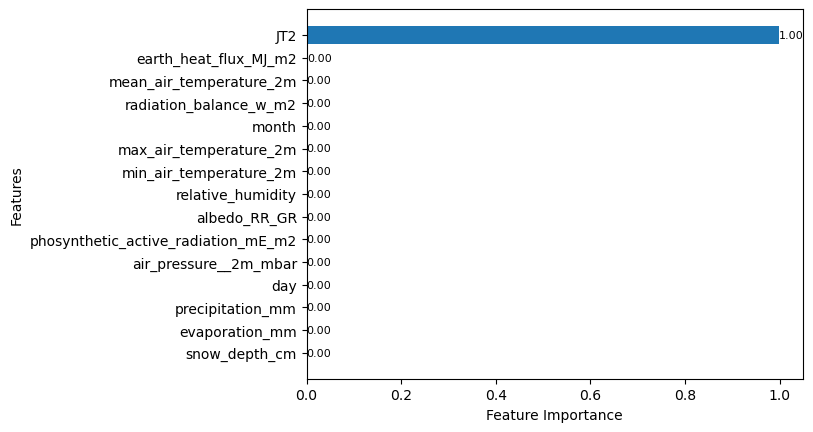

In [76]:
# Feature parameter analysis for JT5
X_train_f, X_test_f, Y_train_f, Y_test_f = predict_feature(dataset_normalized, ['JT100','JT50','JT20','JT10','ID'], 'JT5', rs_model)
plot_features(X_train_f.columns, rs_model.feature_importances_, 'images/JT5_feature_analysis.png')

#### JT10 Feature Importance analysis

{'Training Set R^2 Score': 0.9997804575662923, 'Validation Set R^2 Score': 0.9988066028095375, 'Training Set MAE': 0.008010069018945612, 'Validation Set MAE': 0.0205551027634169, 'Training Set MSE': 0.00022009286959323018, 'Validation Set MSE': 0.001180742638385011, 'Training Set Median Absolute Error': 0.005335353765864137, 'Validation Set Median Absolute Error': 0.013878127169474404, 'Training Set MA Percentage Error': 0.0722099988710821, 'Validation Set MA Percentage Error': 0.11370739756137666, 'Training Set Max Error': 0.3363890441626054, 'Validation Set Max Error': 0.41510508165452475, 'Training Set Explained Variance Score': 0.9997804991490287, 'Validation Set Explained Variance Score': 0.9988092890866561}


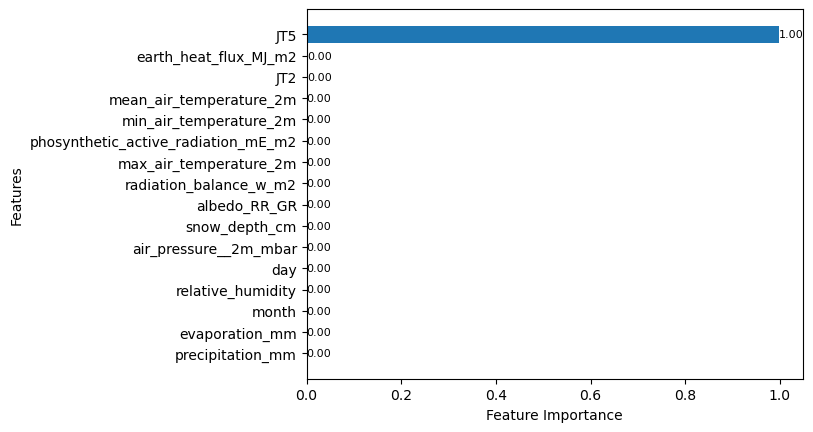

In [77]:
# Feature parameter analysis for JT10
X_train_f, X_test_f, Y_train_f, Y_test_f = predict_feature(dataset_normalized, ['JT100','JT50','JT20', 'ID'], 'JT10', rs_model)
plot_features(X_train_f.columns, rs_model.feature_importances_, 'images/JT10_feature_analysis.png')

#### JT20 Feature Importance analysis

{'Training Set R^2 Score': 0.9996256345534584, 'Validation Set R^2 Score': 0.9974146407888451, 'Training Set MAE': 0.010272136174399949, 'Validation Set MAE': 0.02732413295143355, 'Training Set MSE': 0.0003746767025505198, 'Validation Set MSE': 0.0025733443166558903, 'Training Set Median Absolute Error': 0.006181904891704754, 'Validation Set Median Absolute Error': 0.0161350468680119, 'Training Set MA Percentage Error': 0.056153064287664714, 'Validation Set MA Percentage Error': 0.1283482540222015, 'Training Set Max Error': 0.4046784885228643, 'Validation Set Max Error': 0.6931813578173527, 'Training Set Explained Variance Score': 0.9996259270391705, 'Validation Set Explained Variance Score': 0.9974147798918814}


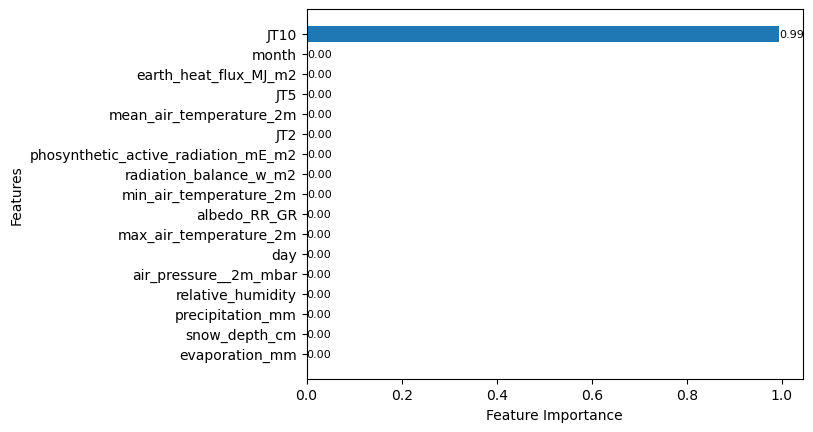

In [78]:
# Feature parameter analysis for JT20
X_train_f, X_test_f, Y_train_f, Y_test_f = predict_feature(dataset_normalized, ['JT100','JT50','ID'], 'JT20', rs_model)
plot_features(X_train_f.columns, rs_model.feature_importances_, 'images/JT20_feature_analysis.png')

#### JT50 Feature Importance analysis

{'Training Set R^2 Score': 0.9970484815241116, 'Validation Set R^2 Score': 0.9398491591102476, 'Training Set MAE': 0.019879147997540945, 'Validation Set MAE': 0.056334459355339934, 'Training Set MSE': 0.0029134467644043463, 'Validation Set MSE': 0.0631747209009547, 'Training Set Median Absolute Error': 0.012852334728793713, 'Validation Set Median Absolute Error': 0.0346510451185742, 'Training Set MA Percentage Error': 2.217637086419386, 'Validation Set MA Percentage Error': 0.641990814724793, 'Training Set Max Error': 3.2797990891774838, 'Validation Set Max Error': 10.0502965876381, 'Training Set Explained Variance Score': 0.997048523196524, 'Validation Set Explained Variance Score': 0.9399131525275243}


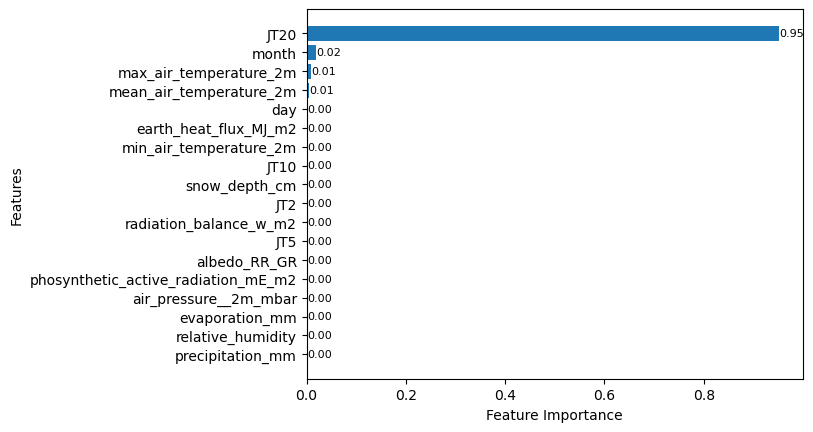

In [79]:
# Feature parameter analysis for JT50
X_train_f, X_test_f, Y_train_f, Y_test_f = predict_feature(dataset_normalized, ['JT100','ID'], 'JT50', rs_model)
plot_features(X_train_f.columns, rs_model.feature_importances_, 'images/JT50_feature_analysis.png')

## From the Feature Importance Analysis, the prediction of the soil temperature at a certain depth depeneds majorly on the depth above it and the soil temperature at 2cm, depends on the mean air temperature (92%), evaporation (3%), month(2%), day, heat flux and snow depth (three of them combined less than 3%)
## Conclusion: If we predict the soil temperature at 2cm from mean air temperature, evaporation, month, day, heat flux and snow depth, we can predict the other soil temperatures at different depths.

### Advantages of Random Forest Regression
1. It is easy to use and less sensitive to the training data compared to the decision tree.
2. It is more accurate than the decision tree algorithm.
3. It is effective in handling large datasets that have many attributes.
4. It can handle missing data, outliers, and noisy features.
### Disadvantages of Random Forest Regression
1. The model can also be difficult to interpret.
2. This algorithm may require some domain expertise to choose the appropriate parameters like the number of decision trees, the maximum depth of each tree, and the number of features to consider at each split.
4. It is computationally expensive, especially for large datasets.
5. It may suffer from overfitting if the model is too complex or the number of decision trees is too high.